In [1]:
import numpy as np
from IPython import get_ipython
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import networkx as nx

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', 5000)


In [6]:
# import plotly for visualization

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import plotly.express as px

# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [50]:
df = pd.read_excel('GDS_EY_Badges_Earned8528efa.xlsx')

In [51]:
df.head()

Requestor GPN  GUI LastName FirstName        EmailAddress  \
0         GPN 1  123      XY1       ABC  abc.xyz@gds.ey.com   
1         GPN 2  123      XY2       ABC  abc.xyz@gds.ey.com   
2         GPN 3  123      XY3       ABC  abc.xyz@gds.ey.com   
3         GPN 4  123      XY4       ABC  abc.xyz@gds.ey.com   
4         GPN 5  123      XY5       ABC  abc.xyz@gds.ey.com   

  EmployeeStatusDesc    Country Rank Name Badge Type Badge Status  \
0         Terminated  Country 3    Rank 9     Bronze     Approved   
1         Terminated  Country 3    Rank 9     Bronze     Approved   
2             Active  Country 3    Rank 9     Bronze     Approved   
3             Active  Country 3    Rank 1     Bronze     Approved   
4             Active  Country 3    Rank 9     Bronze     Approved   

                Domain                  Sub Domain Badge Classification  \
0            Analytics                Data science           TECHNOLOGY   
1  Emerging Technology  Robotic process automation           TECHNOLOGY   
2  Emerging Technology                  Blockchain           TECHNOLOGY   
3            Analytics          Data visualization           TECHNOLOGY   
4            Analytics          Data visualization           TECHNOLOGY   

  Badge earned GDS SL Initiate a badge date  
0   2020-03-26  SL 26            2018-05-30  
1   2019-04-26  SL 26            2019-04-22  
2   2020-02-20  SL 20            2020-01-14  
3   2019-09-20   SL 8            2019-09-18  
4   2019-10-31  SL 25            2019-10-21

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Requestor GPN          20252 non-null  object        
 1   GUI                    20252 non-null  int64         
 2   LastName               20252 non-null  object        
 3   FirstName              20252 non-null  object        
 4   EmailAddress           20252 non-null  object        
 5   EmployeeStatusDesc     20252 non-null  object        
 6   Country                20252 non-null  object        
 7   Rank Name              20252 non-null  object        
 8   Badge Type             20252 non-null  object        
 9   Badge Status           20252 non-null  object        
 10  Domain                 20252 non-null  object        
 11  Sub Domain             20252 non-null  object        
 12  Badge Classification   20252 non-null  object        
 13  B

In [17]:
#df['Badge earned'] = str(df['Badge earned'])
df['Badge earned'] = pd.to_datetime(df['Badge earned'])

In [53]:
df = df.sort_values(by = 'Badge earned')

In [54]:
df.groupby('Badge earned').count().iplot()

In [67]:
df.head()

Requestor GPN  GUI LastName FirstName        EmailAddress  \
2552       GPN 2553  123   XY2553       ABC  abc.xyz@gds.ey.com   
14848     GPN 14849  123  XY14849       ABC  abc.xyz@gds.ey.com   
2668       GPN 2669  123   XY2669       ABC  abc.xyz@gds.ey.com   
17235     GPN 17236  123  XY17236       ABC  abc.xyz@gds.ey.com   
8105       GPN 8106  123   XY8106       ABC  abc.xyz@gds.ey.com   

      EmployeeStatusDesc    Country Rank Name Badge Type Badge Status  \
2552              Active  Country 1   Rank 13     Bronze     Approved   
14848             Active  Country 3   Rank 13     Bronze     Approved   
2668              Active  Country 3   Rank 14     Bronze     Approved   
17235             Active  Country 5   Rank 13     Bronze     Approved   
8105          Terminated  Country 3   Rank 15     Bronze     Approved   

                    Domain                  Sub Domain Badge Classification  \
2552             Analytics            Data integration           TECHNOLOGY   
14848  Emerging Technology  Robotic process automation           TECHNOLOGY   
2668             Analytics                Data science           TECHNOLOGY   
17235  Emerging Technology  Robotic process automation           TECHNOLOGY   
8105   Emerging Technology     Artificial intelligence           TECHNOLOGY   

      Badge earned GDS SL Initiate a badge date  
2552    2017-12-20   SL 6            2017-11-29  
14848   2017-12-20  SL 17            2017-12-19  
2668    2018-01-08   SL 6            2017-12-28  
17235   2018-01-08  SL 20            2018-01-03  
8105    2018-01-17   SL 6            2017-12-01

In [135]:
process_list = df['Rank Name'].to_list()
#process_list.extend(df['Domain'].to_list())
process_list.extend(df['Sub Domain'].to_list())

process_list = (set(process_list))
proc_list = pd.DataFrame(process_list, columns = ['process_list'])

In [136]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()

In [137]:
proc_list.loc[:, 'process_list_encoded'] = labelencoder_X_1.fit_transform(proc_list.loc[:, 'process_list'])
proc_list = proc_list.sort_values(by = 'process_list_encoded').reset_index(drop = True)
proc_list

process_list  process_list_encoded
0                       Advanced Manufacturing                     0
1                                        Agile                     1
2                                      Agility                     2
3                      Artificial intelligence                     3
4         BCM - Corporate & Commercial Banking                     4
5   BCM - Investment Banking & Capital Markets                     5
6                                   Blockchain                     6
7            Climate change and sustainability                     7
8                            Consumer Products                     8
9                                    Curiosity                     9
10                               Cybersecurity                    10
11                           Data architecture                    11
12                            Data integration                    12
13                               Data platform                    13
14                                Data science                    14
15                          Data visualization                    15
16                             Design thinking                    16
17                                     Digital                    17
18                                Dynamics 365                    18
19                                     Finance                    19
20                      Global team leadership                    20
21                  Government & Public Sector                    21
22                     Inclusion and Belonging                    22
23                      Inclusive Intelligence                    23
24                        Information strategy                    24
25                                   Inspiring                    25
26                                   Insurance                    26
27                               Life Sciences                    27
28                             Mining & Metals                    28
29                                    Mobility                    29
30                            Modern Workplace                    30
31                                  My Purpose                    31
32                                   Oil & Gas                    32
33                                   Oil & gas                    33
34                           Power & Utilities                    34
35                           Power & utilities                    35
36                              Private Equity                    36
37                                      Rank 1                    37
38                                     Rank 10                    38
39                                     Rank 11                    39
40                                     Rank 12                    40
41                                     Rank 13                    41
42                                     Rank 14                    42
43                                     Rank 15                    43
44                                      Rank 2                    44
45                                      Rank 3                    45
46                                      Rank 4                    46
47                                      Rank 5                    47
48                                      Rank 6                    48
49                                      Rank 7                    49
50                                      Rank 8                    50
51                                      Rank 9                    51
52     Real Estate, Hospitality & Construction                    52
53                                      Retail                    53
54                  Robotic process automation                    54
55                              SAP Foundation                    55
56                                    Strategy                    56
57                 TMT - Media &

In [77]:
proc_list['Type'] = 'Type1'

In [78]:
df_node = proc_list[['process_list','process_list_encoded', 'Type']]
df_node.shape

(28, 3)

In [138]:
res = dict(zip(proc_list.process_list, proc_list.process_list_encoded))

In [139]:
df['Parent_process_encoded'] = df['Rank Name'].map(res)
df['New_process_encoded'] = df['Sub Domain'].map(res)

In [56]:
#df_node = df_node.drop_duplicates()

In [57]:
#unique_proc = pd.DataFrame({'process_count' : df.groupby([ 'Initiate a badge date','Rank Name','Domain','Sub Domain']).size()}).reset_index()

In [88]:
df_edge = df[['Parent_process_encoded','New_process_encoded','Initiate a badge date']]

In [89]:
#df_edge = unique_proc
df_edge.head()

Parent_process_encoded  New_process_encoded Initiate a badge date
2552                       12                    0            2017-11-29
14848                      12                    4            2017-12-19
2668                       13                    0            2017-12-28
17235                      12                    4            2018-01-03
8105                       14                    4            2017-12-01

In [90]:
df_edge['Initiate a badge date'] = df_edge['Initiate a badge date'].astype('str')

In [92]:
edge1 = df_edge
node1 = df_node

In [93]:
edge1.head()

Parent_process_encoded  New_process_encoded Initiate a badge date
2552                       12                    0            2017-11-29
14848                      12                    4            2017-12-19
2668                       13                    0            2017-12-28
17235                      12                    4            2018-01-03
8105                       14                    4            2017-12-01

In [94]:
G = nx.from_pandas_edgelist(edge1, 'Parent_process_encoded', 'New_process_encoded', ['Parent_process_encoded', 'New_process_encoded', 'Initiate a badge date'], create_using=nx.MultiDiGraph())
nx.set_node_attributes(G, node1.set_index('process_list_encoded')['process_list'].to_dict(), 'process_list')
nx.set_node_attributes(G, node1.set_index('process_list_encoded')['Type'].to_dict(), 'Type')
pos = nx.layout.spring_layout(G)

In [140]:
df.head()

Requestor GPN  GUI LastName FirstName        EmailAddress  \
2552       GPN 2553  123   XY2553       ABC  abc.xyz@gds.ey.com   
14848     GPN 14849  123  XY14849       ABC  abc.xyz@gds.ey.com   
2668       GPN 2669  123   XY2669       ABC  abc.xyz@gds.ey.com   
17235     GPN 17236  123  XY17236       ABC  abc.xyz@gds.ey.com   
8105       GPN 8106  123   XY8106       ABC  abc.xyz@gds.ey.com   

      EmployeeStatusDesc    Country Rank Name Badge Type Badge Status  \
2552              Active  Country 1   Rank 13     Bronze     Approved   
14848             Active  Country 3   Rank 13     Bronze     Approved   
2668              Active  Country 3   Rank 14     Bronze     Approved   
17235             Active  Country 5   Rank 13     Bronze     Approved   
8105          Terminated  Country 3   Rank 15     Bronze     Approved   

                    Domain                  Sub Domain Badge Classification  \
2552             Analytics            Data integration           TECHNOLOGY   
14848  Emerging Technology  Robotic process automation           TECHNOLOGY   
2668             Analytics                Data science           TECHNOLOGY   
17235  Emerging Technology  Robotic process automation           TECHNOLOGY   
8105   Emerging Technology     Artificial intelligence           TECHNOLOGY   

      Badge earned GDS SL Initiate a badge date  Parent_process_encoded  \
2552    2017-12-20   SL 6            2017-11-29                      41   
14848   2017-12-20  SL 17            2017-12-19                      41   
2668    2018-01-08   SL 6            2017-12-28                      42   
17235   2018-01-08  SL 20            2018-01-03                      41   
8105    2018-01-17   SL 6            2017-12-01                      43   

       New_process_encoded  
2552                    12  
14848                   54  
2668                    14  
17235                   54  
8105                     3

In [141]:
g = nx.from_pandas_edgelist(df,source = 'Parent_process_encoded', target = 'New_process_encoded',edge_attr = ['Initiate a badge date'],create_using=nx.DiGraph())

In [142]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 362
Average in degree:   5.2464
Average out degree:   5.2464


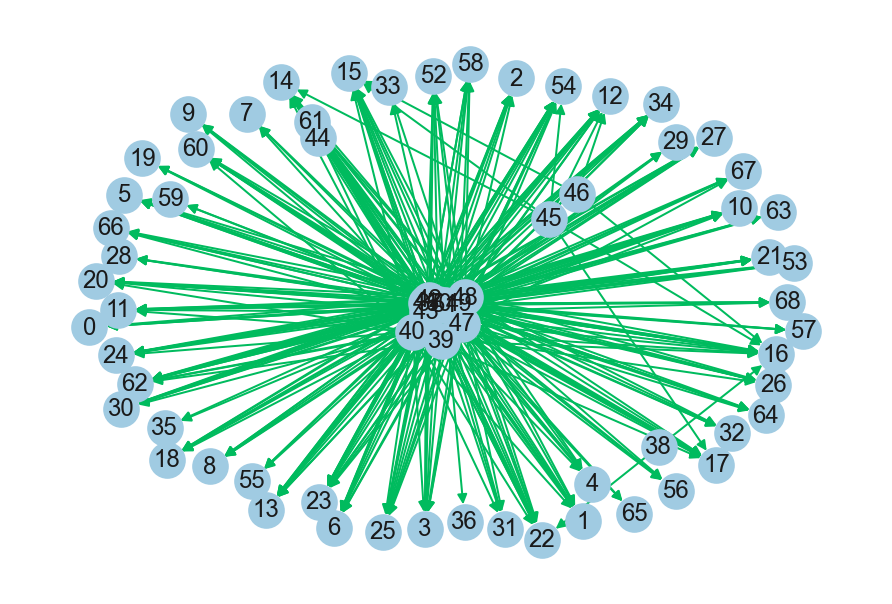

In [143]:
pos=nx.spring_layout(g)
nx.draw(g,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)


In [144]:
#No. of unique nodes
len(g.nodes)

69

In [145]:
import random
edges = dict()
for edge in g.edges:
    edges[(edge[0], edge[1])] = 1

In [146]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 362
Average in degree:   5.2464
Average out degree:   5.2464


In [147]:
import random
missing_edges = set([])
while (len(missing_edges)< 69):
    a=random.randint(1, 362)
    b=random.randint(1, 362)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            if nx.shortest_path_length(g,source=a,target=b) > 2: 
                
                missing_edges.add((a,b))
            else:
                continue  
        except:  
                missing_edges.add((a,b))              
    else:
        continue

In [148]:
len(missing_edges)

69

In [149]:
missing_edges

{(1, 251),
 (12, 150),
 (13, 305),
 (18, 117),
 (24, 264),
 (30, 27),
 (34, 99),
 (38, 122),
 (49, 101),
 (50, 254),
 (64, 149),
 (65, 157),
 (66, 130),
 (71, 323),
 (73, 33),
 (82, 271),
 (84, 12),
 (99, 167),
 (100, 114),
 (107, 250),
 (114, 339),
 (120, 141),
 (123, 217),
 (130, 166),
 (133, 179),
 (139, 40),
 (147, 108),
 (147, 187),
 (150, 155),
 (156, 24),
 (157, 278),
 (158, 312),
 (160, 224),
 (162, 69),
 (166, 86),
 (174, 152),
 (183, 265),
 (186, 8),
 (187, 209),
 (188, 265),
 (190, 35),
 (192, 268),
 (195, 45),
 (196, 243),
 (200, 246),
 (202, 261),
 (205, 252),
 (207, 290),
 (207, 354),
 (213, 318),
 (217, 90),
 (224, 299),
 (227, 135),
 (228, 180),
 (244, 132),
 (251, 209),
 (259, 79),
 (259, 348),
 (276, 316),
 (294, 57),
 (303, 3),
 (311, 104),
 (322, 342),
 (324, 95),
 (349, 213),
 (352, 238),
 (356, 90),
 (356, 230),
 (360, 265)}

In [150]:
import pickle
pickle.dump(missing_edges,open('missing_edges_final.p','wb'))

In [151]:
import pickle
missing_edges = pickle.load(open('missing_edges_final.p','rb'))

In [152]:
df.head()

Requestor GPN  GUI LastName FirstName        EmailAddress  \
2552       GPN 2553  123   XY2553       ABC  abc.xyz@gds.ey.com   
14848     GPN 14849  123  XY14849       ABC  abc.xyz@gds.ey.com   
2668       GPN 2669  123   XY2669       ABC  abc.xyz@gds.ey.com   
17235     GPN 17236  123  XY17236       ABC  abc.xyz@gds.ey.com   
8105       GPN 8106  123   XY8106       ABC  abc.xyz@gds.ey.com   

      EmployeeStatusDesc    Country Rank Name Badge Type Badge Status  \
2552              Active  Country 1   Rank 13     Bronze     Approved   
14848             Active  Country 3   Rank 13     Bronze     Approved   
2668              Active  Country 3   Rank 14     Bronze     Approved   
17235             Active  Country 5   Rank 13     Bronze     Approved   
8105          Terminated  Country 3   Rank 15     Bronze     Approved   

                    Domain                  Sub Domain Badge Classification  \
2552             Analytics            Data integration           TECHNOLOGY   
14848  Emerging Technology  Robotic process automation           TECHNOLOGY   
2668             Analytics                Data science           TECHNOLOGY   
17235  Emerging Technology  Robotic process automation           TECHNOLOGY   
8105   Emerging Technology     Artificial intelligence           TECHNOLOGY   

      Badge earned GDS SL Initiate a badge date  Parent_process_encoded  \
2552    2017-12-20   SL 6            2017-11-29                      41   
14848   2017-12-20  SL 17            2017-12-19                      41   
2668    2018-01-08   SL 6            2017-12-28                      42   
17235   2018-01-08  SL 20            2018-01-03                      41   
8105    2018-01-17   SL 6            2017-12-01                      43   

       New_process_encoded  
2552                    12  
14848                   54  
2668                    14  
17235                   54  
8105                     3

In [154]:
#reading total data df
df_pos = df[['Parent_process_encoded','New_process_encoded']]
df_neg = pd.DataFrame(list(missing_edges), columns=['Parent_process_encoded', 'New_process_encoded'])

In [155]:
#positive links i.e graph
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20252 entries, 2552 to 825
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Parent_process_encoded  20252 non-null  int64
 1   New_process_encoded     20252 non-null  int64
dtypes: int64(2)
memory usage: 474.7 KB


In [156]:
#negative links synthesized links
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Parent_process_encoded  69 non-null     int64
 1   New_process_encoded     69 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [157]:
#Trian test split 
#Spiltted data into 80-20 
#positive links and negative links seperatly because we need positive training data only for creating graph 
#and for feature generation
from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)

In [158]:
df_train_pos = pd.DataFrame(X_train_pos)
#removing header and saving
df_train_pos.to_csv('train_data.csv',header=False,index=False)

In [159]:
#Graph from Traing data only 
g=nx.read_edgelist('train_data.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 348
Average in degree:   5.0435
Average out degree:   5.0435


In [160]:
#Graph of total data without splitting 
G=nx.from_pandas_edgelist(df,source = 'Parent_process_encoded', target = 'New_process_encoded',create_using=nx.DiGraph())
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 362
Average in degree:   5.2464
Average out degree:   5.2464


In [161]:
###total nodes in train positive data
train_nodes_pos = set(g.nodes())
###total nodes in total data
total_nodes_pos = set(G.nodes())
###test nodes in pos data
test_nodes_pos = set(X_test_pos.values.flatten())

In [162]:
print('no of process common in train and test -- ',len(train_nodes_pos.intersection(test_nodes_pos)))
print('no of process present in train but not present in test -- ',len(train_nodes_pos - test_nodes_pos))
print('no of process present in test but not present in train -- ',len(test_nodes_pos - train_nodes_pos))

no of process common in train and test --  62
no of process present in train but not present in test --  7
no of process present in test but not present in train --  0


In [163]:
print(' % of processes not there in Train but exist in Test in total Test data are {} %'.\
                  format(len(test_nodes_pos - train_nodes_pos)/len(test_nodes_pos)*100))

 % of processes not there in Train but exist in Test in total Test data are 0.0 %


In [164]:
#final train and test data sets
df_final_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_final_train = np.concatenate((y_train_pos,y_train_neg))
df_final_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_final_test = np.concatenate((y_test_pos,y_test_neg))

In [165]:
df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16256 entries, 0 to 16255
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Parent_process_encoded  16256 non-null  int64
 1   New_process_encoded     16256 non-null  int64
dtypes: int64(2)
memory usage: 254.1 KB


In [166]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Parent_process_encoded  4065 non-null   int64
 1   New_process_encoded     4065 non-null   int64
dtypes: int64(2)
memory usage: 63.6 KB


In [167]:
Adj = nx.adjacency_matrix(g,nodelist=sorted(g.nodes()))

In [168]:
Adj = Adj.asfptype()
Adj

<69x69 sparse matrix of type '<class 'numpy.float64'>'
	with 348 stored elements in Compressed Sparse Row format>

In [170]:
from scipy.sparse.linalg import svds, eigs
U, s, V = svds(Adj,k = 3)

In [171]:
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

U Shape (69, 3)
V Shape (3, 69)
s Shape (3,)


In [172]:
del Adj
del s

In [173]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (len(set(g.successors(a)).union(set(g.successors(b)))))
    except:
        return 0
    return sim

In [174]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 (len(set(g.predecessors(a)).union(set(g.predecessors(b)))))
        return sim
    except:
        return 0

In [175]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (math.sqrt(len(set(g.successors(a)))*len((set(g.successors(b))))))
        return sim
    except:
        return 0

In [176]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                     (math.sqrt(len(set(g.predecessors(a))))*(len(set(g.predecessors(b)))))
        return sim
    except:
        return 0

In [177]:
pr = nx.pagerank(g, alpha=0.85)

In [178]:
pickle.dump(pr,open('page_rank.p','wb'))

In [179]:
pr = pickle.load(open('page_rank.p','rb'))

In [180]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 0.012232505880878514
max 0.027841927008712693
mean 0.014492753623188404


In [181]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)

### Shortest path

In [182]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if g.has_edge(a,b):
            g.remove_edge(a,b)
            p= nx.shortest_path_length(g,source=a,target=b)
            g.add_edge(a,b)
        else:
            p= nx.shortest_path_length(g,source=a,target=b)
        return p
    except:
        return -1

### cheking for same community

In [183]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(g))
def belongs_to_same_wcc(a,b):
    index = []
    if g.has_edge(b,a):
        return 1
    if g.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                g.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    g.add_edge(a,b)
                    return 0
                else:
                    g.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

### Adar index

In [184]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(g.successors(a)).intersection(set(g.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(g.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

### does process was following back

In [185]:
def follows_back(a,b):
    if g.has_edge(b,a):
        return 1
    else:
        return 0

### Katz centrality 

In [186]:
katz = nx.katz.katz_centrality(g,alpha=0.005,beta=1)

In [187]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.11740320278885276
max 0.12503441097012818
mean 0.12036380529396302


In [188]:
mean_katz = float(sum(katz.values())) / len(katz)

### Hits score

In [189]:
hits = nx.hits(g, max_iter=100, tol=1e-08, nstart=None, normalized=True)
#hits = pickle.load(open('hits.p','rb'))

In [190]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min 0.0
max 0.12806228269198106
mean 0.014492753623188406


In [191]:
pickle.dump(hits,open('hits.p','wb'))

### From all above scores preparing data set

In [192]:
#mapping jaccrd followers to train data
df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                        jaccard_for_followers(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

In [193]:
#mapping jaccrd followers to test data
df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                        jaccard_for_followers(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

In [194]:
#mapping jaccrd followees to train and test data
df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                        jaccard_for_followees(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)
df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                        jaccard_for_followees(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

In [195]:
#calculating no of followers followees for source and destination
#calculating intersection of followers and followees for source and destination
num_followers_s=[]
num_followees_s=[]
num_followers_d=[]
num_followees_d=[]
inter_followers=[]
inter_followees=[]
for i,row in df_final_train.iterrows():
    try:
        s1=set(g.predecessors(row['Parent_process_encoded']))
        s2=set(g.successors(row['Parent_process_encoded']))
    except:
        s1 = set()
        s2 = set()
    try:
        d1=set(g.predecessors(row['New_process_encoded']))
        d2=set(g.successors(row['New_process_encoded']))
    except:
        d1 = set()
        d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))
    
    inter_followers.append(len(s1.intersection(d1)))
    inter_followees.append(len(s2.intersection(d2)))

In [196]:
df_final_train['num_followers_s']=num_followers_s
df_final_train['num_followees_s']=num_followees_s
df_final_train['num_followers_d']=num_followers_d
df_final_train['num_followees_d']=num_followees_d
df_final_train['inter_followers']=inter_followers
df_final_train['inter_followees']=inter_followees

In [197]:
#For test data
#calculating no of followers followees for source and destination
#calculating intersection of followers and followees for source and destination
num_followers_s=[]
num_followees_s=[]
num_followers_d=[]
num_followees_d=[]
inter_followers=[]
inter_followees=[]
for i,row in df_final_test.iterrows():
    try:
        s1=set(g.predecessors(row['Parent_process_encoded']))
        s2=set(g.successors(row['Parent_process_encoded']))
    except:
        s1 = set()
        s2 = set()
    try:
        d1=set(g.predecessors(row['New_process_encoded']))
        d2=set(g.successors(row['New_process_encoded']))
    except:
        d1 = set()
        d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))
    
    inter_followers.append(len(s1.intersection(d1)))
    inter_followees.append(len(s2.intersection(d2)))

In [198]:
#assigning
df_final_test['num_followers_s']=num_followers_s
df_final_test['num_followees_s']=num_followees_s
df_final_test['num_followers_d']=num_followers_d
df_final_test['num_followees_d']=num_followees_d
df_final_test['inter_followers']=inter_followers
df_final_test['inter_followees']=inter_followees

In [199]:
#saving to disk 
df_final_train.to_csv('df_final_train_some.csv',index=False)
df_final_test.to_csv('df_final_test_some.csv',index=False)

In [200]:
#head of df 
df_final_train.head()

Parent_process_encoded  New_process_encoded  jaccard_followers  \
0                      50                   12                0.0   
1                      50                   10                0.0   
2                      50                    4                0.0   
3                      51                   15                0.0   
4                      50                   11                0.0   

   jaccard_followees  num_followers_s  num_followees_s  num_followers_d  \
0                0.0                0               52               10   
1                0.0                0               52                9   
2                0.0                0               52                6   
3                0.0                0               52               12   
4                0.0                0               52                8   

   num_followees_d  inter_followers  inter_followees  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0  
4                0                0                0

In [201]:
df_final_test.head()

Parent_process_encoded  New_process_encoded  jaccard_followers  \
0                      51                   10                0.0   
1                      50                   15                0.0   
2                      51                   15                0.0   
3                      51                   15                0.0   
4                      50                   15                0.0   

   jaccard_followees  num_followers_s  num_followees_s  num_followers_d  \
0                0.0                0               52                9   
1                0.0                0               52               12   
2                0.0                0               52               12   
3                0.0                0               52               12   
4                0.0                0               52               12   

   num_followees_d  inter_followers  inter_followees  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0  
4                0                0                0

In [202]:
#mapping adar index on train
df_final_train['adar_index'] = df_final_train.apply(lambda row:
                                        calc_adar_in(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

#mapping adar index on test
df_final_test['adar_index'] = df_final_test.apply(lambda row:
                                        calc_adar_in(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

In [203]:
#mapping followback or not on train
df_final_train['follows_back'] = df_final_train.apply(lambda row:
                                        follows_back(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

#mapping followback or not on test
df_final_test['follows_back'] = df_final_test.apply(lambda row:
                                        follows_back(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

In [204]:
##mapping same component of wcc or not on train
df_final_train['same_comp'] = df_final_train.apply(lambda row:
                                        belongs_to_same_wcc(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

##mapping same component of wcc or not on train
df_final_test['same_comp'] = df_final_test.apply(lambda row:
                                        belongs_to_same_wcc(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

In [205]:
#saving to disk beacuse above operation takes much time so at every check point saving to disk 
df_final_train.to_csv('df_final_train_some1.csv',index=False)
df_final_test.to_csv('df_final_test_some1.csv',index=False)

In [206]:
df_final_train = pd.read_csv('df_final_train_some1.csv')
df_final_test = pd.read_csv('df_final_test_some1.csv')

In [207]:
#mapping shortest path on train 
df_final_train['shortest_path'] = df_final_train.apply(lambda row:
                                        compute_shortest_path_length(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)

#mapping shortest path on test
df_final_test['shortest_path'] = df_final_test.apply(lambda row:
                                        compute_shortest_path_length(row['Parent_process_encoded'],row['New_process_encoded']),axis=1)


In [208]:
df_final_train.to_csv('df_final_train_some2.csv',index=False)
df_final_test.to_csv('df_final_test_some2.csv',index=False)

In [209]:
#page rank for source and destination in Train
#if anything not there in train graph then adding mean page rank 
df_final_train['page_rank_s'] = df_final_train.Parent_process_encoded.apply(lambda x:pr.get(x,mean_pr))
df_final_train['page_rank_d'] = df_final_train.New_process_encoded.apply(lambda x:pr.get(x,mean_pr))

In [210]:
#page rank for source and destination in Test
#if anything not there in train graph then adding mean page rank 
df_final_test['page_rank_s'] = df_final_test.Parent_process_encoded.apply(lambda x:pr.get(x,mean_pr))
df_final_test['page_rank_d'] = df_final_test.New_process_encoded.apply(lambda x:pr.get(x,mean_pr))

In [211]:
#Katz centrality score for source and destination in Train and test
#if anything not there in train graph then adding mean katz score
df_final_train['katz_s'] = df_final_train.Parent_process_encoded.apply(lambda x: katz.get(x,mean_katz))
df_final_train['katz_d'] = df_final_train.New_process_encoded.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_s'] = df_final_test.Parent_process_encoded.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_d'] = df_final_test.New_process_encoded.apply(lambda x: katz.get(x,mean_katz))

In [212]:
#Hits algorithm score for source and destination in Train 
#if anything not there in train graph then adding 0
df_final_train['hubs_s'] = df_final_train.Parent_process_encoded.apply(lambda x: hits[0].get(x,0))
df_final_train['hubs_d'] = df_final_train.New_process_encoded.apply(lambda x: hits[0].get(x,0))
df_final_train['authorities_s'] = df_final_train.Parent_process_encoded.apply(lambda x: hits[1].get(x,0))
df_final_train['authorities_d'] = df_final_train.New_process_encoded.apply(lambda x: hits[1].get(x,0))

In [213]:
#Hits algorithm score for source and destination in Test 
#if anything not there in train graph then adding 0
df_final_test['hubs_s'] = df_final_test.Parent_process_encoded.apply(lambda x: hits[0].get(x,0))
df_final_test['hubs_d'] = df_final_test.New_process_encoded.apply(lambda x: hits[0].get(x,0))
df_final_test['authorities_s'] = df_final_test.Parent_process_encoded.apply(lambda x: hits[1].get(x,0))
df_final_test['authorities_d'] = df_final_test.New_process_encoded.apply(lambda x: hits[1].get(x,0))

In [214]:
#dependent varible i.e link exist or not
df_final_train['indicator_link'] = y_final_train
df_final_test['indicator_link'] = y_final_test

In [215]:
df_final_train.to_csv('train_df.csv',index=False)
df_final_test.to_csv('test_df.csv',index=False)

In [216]:
df_final_train = pd.read_csv('train_df.csv')
df_final_test = pd.read_csv('test_df.csv')

### Adding SVD Features:

In [217]:
#for svd features to get feature vector creating a dict node val and inex in svd vector
sadj_col = sorted(g.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}
del sadj_col

In [218]:
##creating two df for U valuesfor train and test data with two columns source and destination 
#and each column will have a list of 6 svd features
train_df_svd_u = pd.DataFrame()
test_df_svd_u = pd.DataFrame()
def svd_s(x):
    try:
        z = sadj_dict[x]
        return U[z]
    except:
        return [0,0,0]
train_df_svd_u['features_s'] = df_final_train.Parent_process_encoded.apply(lambda x: svd_s(x))
train_df_svd_u['features_d'] = df_final_train.New_process_encoded.apply(lambda x: svd_s(x))
test_df_svd_u['features_s'] = df_final_test.Parent_process_encoded.apply(lambda x: svd_s(x))
test_df_svd_u['features_d'] = df_final_test.New_process_encoded.apply(lambda x: svd_s(x))

In [219]:
##creating two df for V valuesfor train and test data with two columns source and destination 
#and each column will have a list of 6 svd features
train_df_svd_v = pd.DataFrame()
test_df_svd_v = pd.DataFrame()
def svd_v(x):
    try:
        z = sadj_dict[x]
        return V.T[z]
    except:
        return [0,0,0]
    
train_df_svd_v['features_s'] = df_final_train.Parent_process_encoded.apply(lambda x: svd_v(x))
train_df_svd_v['features_d'] = df_final_train.New_process_encoded.apply(lambda x: svd_v(x))
test_df_svd_v['features_s'] = df_final_test.Parent_process_encoded.apply(lambda x: svd_v(x))
test_df_svd_v['features_d'] = df_final_test.New_process_encoded.apply(lambda x: svd_v(x))

In [220]:
train_df_svd_u.index = df_final_train.index
train_df_svd_v.index = df_final_train.index
test_df_svd_u.index = df_final_test.index
test_df_svd_v.index = df_final_test.index

In [221]:
#Splitting those each one column into 6 features 
#https://stackoverflow.com/questions/35491274/pandas-split-column-of-lists-into-multiple-columns
df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3']] = \
                            pd.DataFrame(train_df_svd_u.features_s.values.tolist(), index= df_final_train.index)
df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3']] = \
                            pd.DataFrame(test_df_svd_u.features_s.values.tolist(), index= df_final_test.index)
df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3']] = \
                            pd.DataFrame(train_df_svd_u.features_d.values.tolist(), index= df_final_train.index)
df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3']] = \
                            pd.DataFrame(test_df_svd_u.features_d.values.tolist(), index= df_final_test.index)

In [222]:
del train_df_svd_u
del test_df_svd_u

In [223]:
#Splitting those each one column into 6 features 
#https://stackoverflow.com/questions/35491274/pandas-split-column-of-lists-into-multiple-columns
df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3']] = \
                            pd.DataFrame(train_df_svd_v.features_s.values.tolist(), index= df_final_train.index)
df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3']] = \
                            pd.DataFrame(test_df_svd_v.features_s.values.tolist(), index= df_final_test.index)
df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3']] = \
                            pd.DataFrame(train_df_svd_v.features_d.values.tolist(), index= df_final_train.index)
df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3']] = \
                            pd.DataFrame(test_df_svd_v.features_d.values.tolist(), index= df_final_test.index)

In [224]:
del train_df_svd_v
del test_df_svd_v
del U
del V
del sadj_dict

In [225]:
#data frame
df_final_train.columns

Index(['Parent_process_encoded', 'New_process_encoded', 'jaccard_followers',
       'jaccard_followees', 'num_followers_s', 'num_followees_s',
       'num_followers_d', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d', 'indicator_link',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [226]:
df_final_train.to_csv('train_df_final.csv',index=False)
df_final_test.to_csv('test_df_final.csv',index=False)

In [227]:
df_final_train = pd.read_csv('train_df_final.csv')
df_final_test = pd.read_csv('test_df_final.csv')

In [228]:
df_final_train.columns

Index(['Parent_process_encoded', 'New_process_encoded', 'jaccard_followers',
       'jaccard_followees', 'num_followers_s', 'num_followees_s',
       'num_followers_d', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d', 'indicator_link',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [229]:
#dependent varible
y_train = df_final_train.indicator_link 
y_test = df_final_test.indicator_link

In [230]:
#dropping some columns
df_final_train.drop(['Parent_process_encoded', 'New_process_encoded','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['Parent_process_encoded', 'New_process_encoded','indicator_link'],axis=1,inplace=True)

In [231]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'num_followers_s',
       'num_followees_s', 'num_followers_d', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [232]:
df_final_test.columns

Index(['jaccard_followers', 'jaccard_followees', 'num_followers_s',
       'num_followees_s', 'num_followers_d', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [233]:
print('Train Shape',df_final_train.shape)
print('Test Shape',df_final_test.shape)

Train Shape (16256, 32)
Test Shape (4065, 32)


In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Estimators =  2 Train Score 0.9991352152696276 test Score 0.9995060508767597
Estimators =  4 Train Score 0.9997531626041345 test Score 1.0
Estimators =  8 Train Score 0.9983054502880735 test Score 0.9982750123213406
Estimators =  16 Train Score 0.9983054502880735 test Score 0.9982750123213406
Estimators =  32 Train Score 0.9996914722942121 test Score 1.0


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

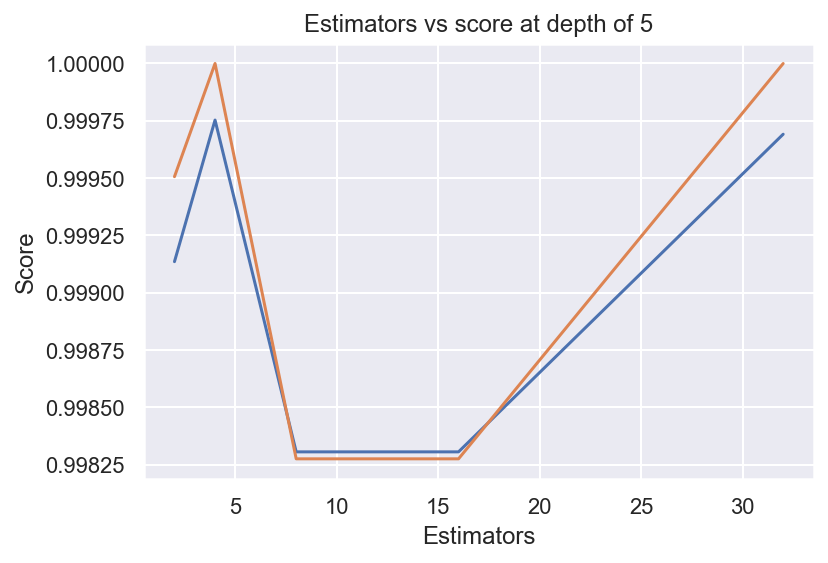

In [236]:
estimators = [2,4,8,16,32]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  2 Train Score 0.9996914722942121 test Score 1.0
depth =  3 Train Score 0.9996914722942121 test Score 1.0
depth =  5 Train Score 0.9996914722942121 test Score 1.0


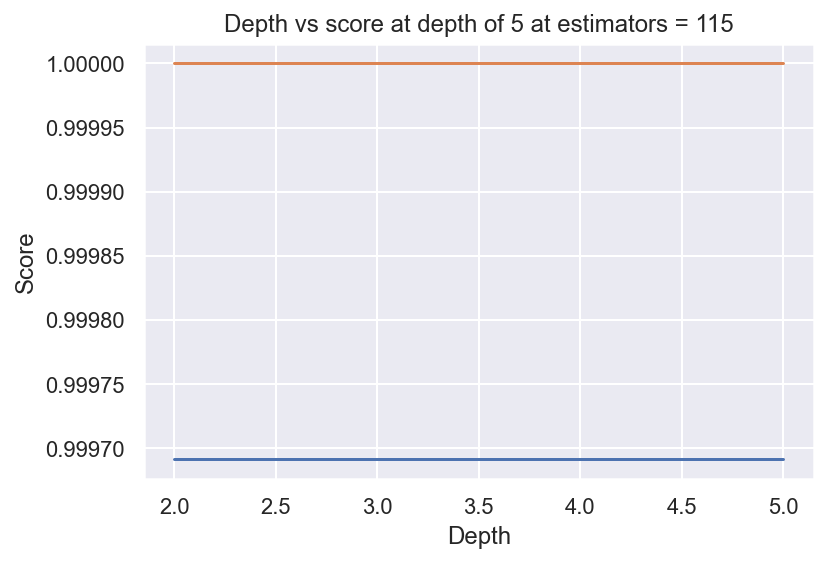

In [238]:
depths = [2,3,5]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [239]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(1,5),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000290799BB640>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000290763BCFD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029076840FA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000290799BB430>},
                   random_state=25, scoring='f1')

In [240]:
import pickle
pickle.dump(rf_random,open('rf_random_2.p','wb'))

In [242]:
rf_random.cv_results_

{'mean_fit_time': array([0.61889114, 0.35158172, 0.33939002, 0.37359102, 0.32581248]),
 'std_fit_time': array([0.89712686, 0.02091809, 0.02498854, 0.09110225, 0.01639886]),
 'mean_score_time': array([0.05118563, 0.05541503, 0.06098297, 0.05514898, 0.07051964]),
 'std_score_time': array([0.01421521, 0.01517801, 0.01694131, 0.01314753, 0.02244539]),
 'param_max_depth': masked_array(data=[1, 3, 2, 4, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[51, 33, 56, 28, 28],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[125, 138, 179, 165, 111],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[117, 109, 106, 108, 121],
              mask=[False, False, False, False, False],
       

In [243]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.99830546 0.99984578 0.99830546 0.99993831 0.99993831]


In [244]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
clf.fit(df_final_train,y_train)

import pickle
pickle.dump(clf,open('clf_rf.p','wb'))

In [245]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


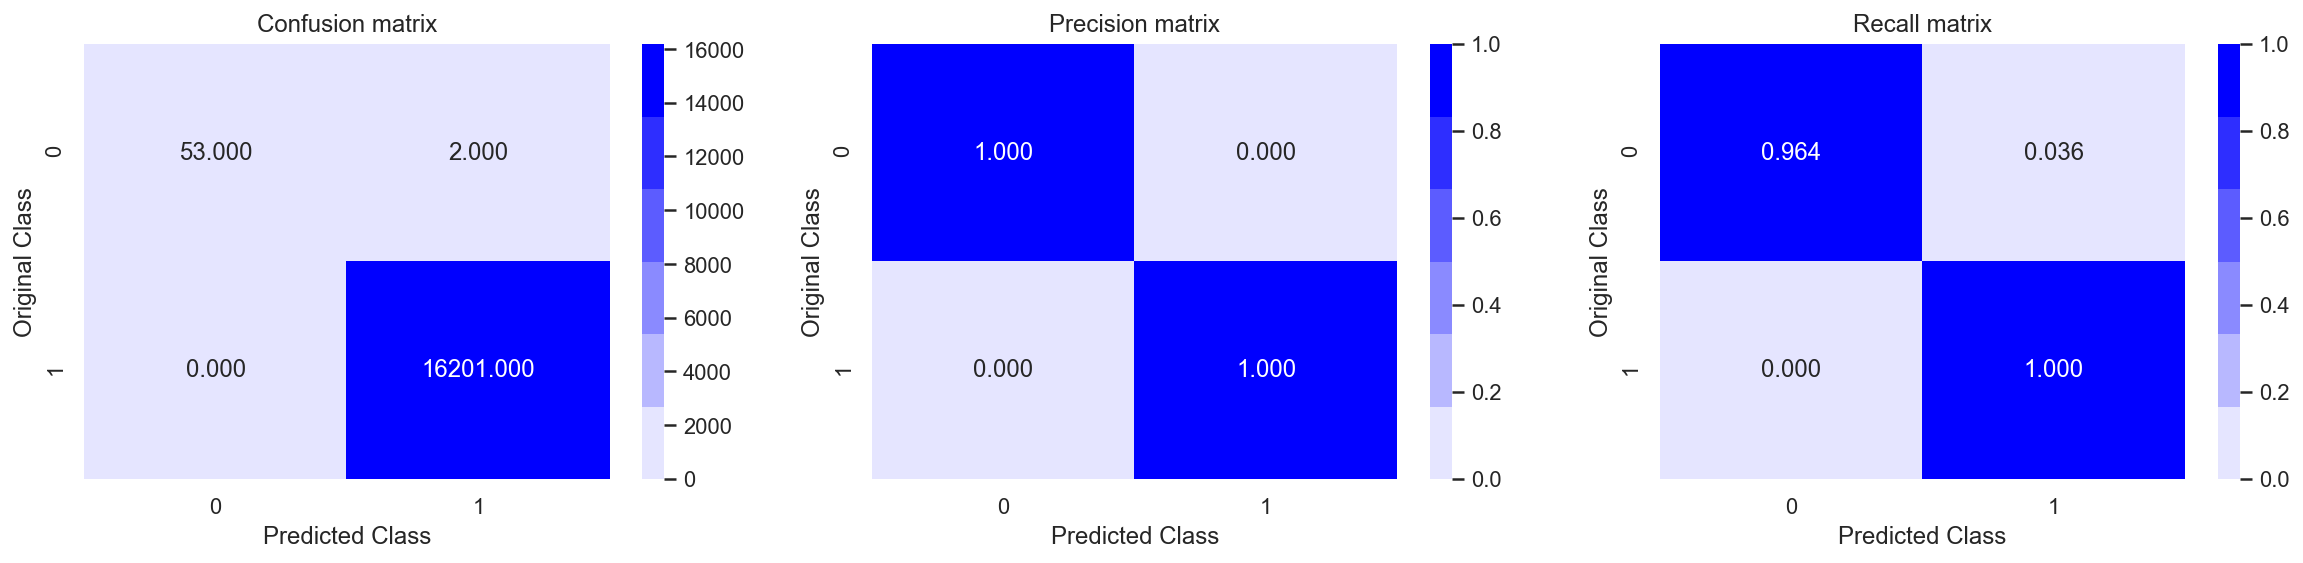

Test confusion_matrix


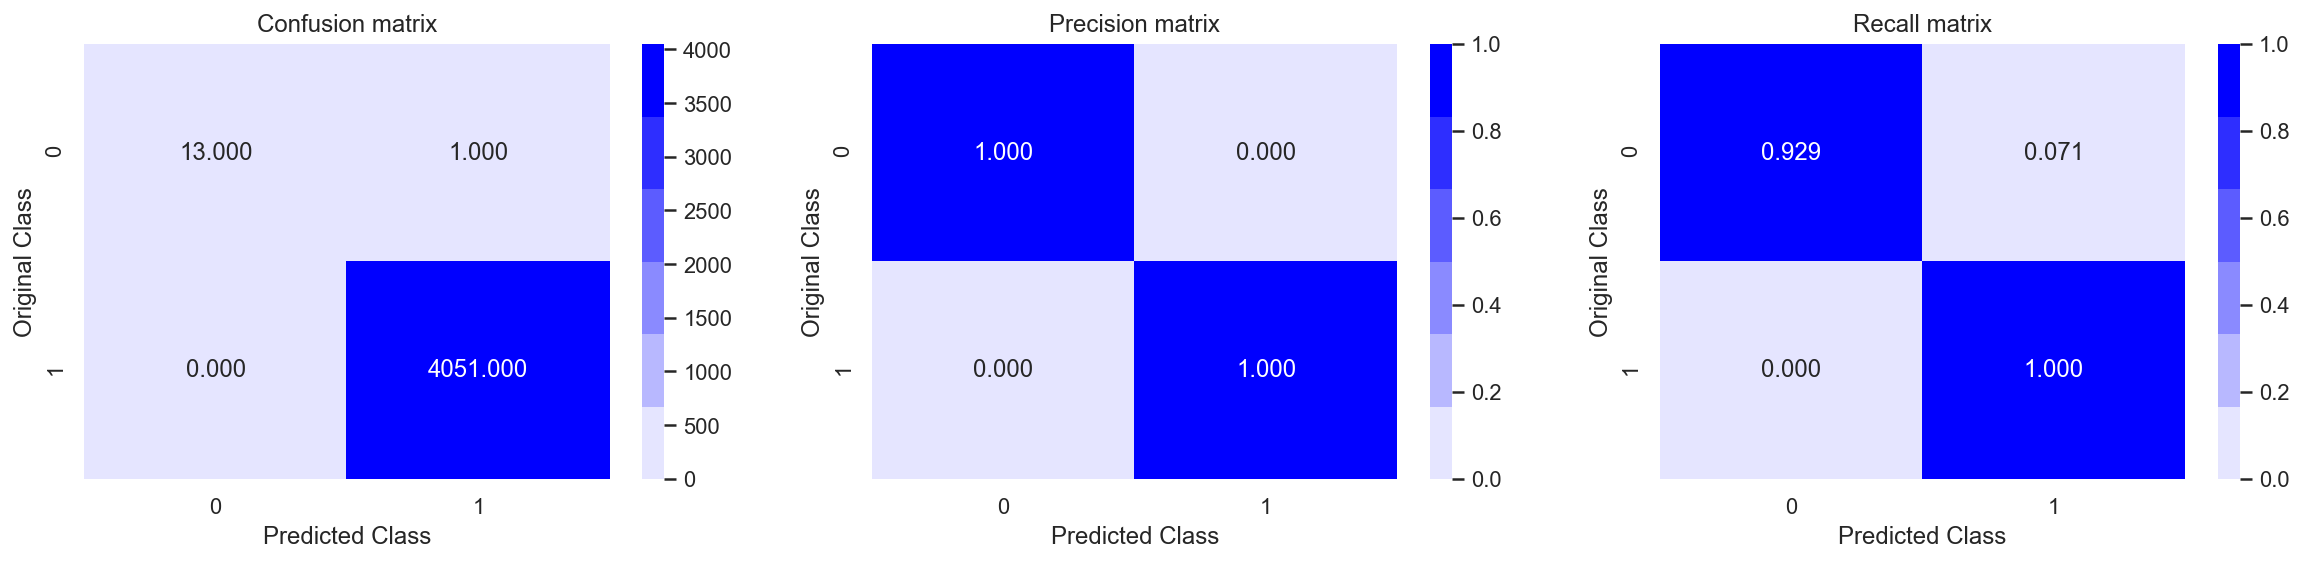

In [246]:
y_pred_train = clf.predict(df_final_train)
y_pred_test = clf.predict(df_final_test)
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_pred_train)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_pred_test)

In [247]:
print('Train f1 score',f1_score(y_train,y_pred_train))
print('Test f1 score',f1_score(y_test,y_pred_test))

Train f1 score 0.9999382792247872
Test f1 score 0.9998765889176848


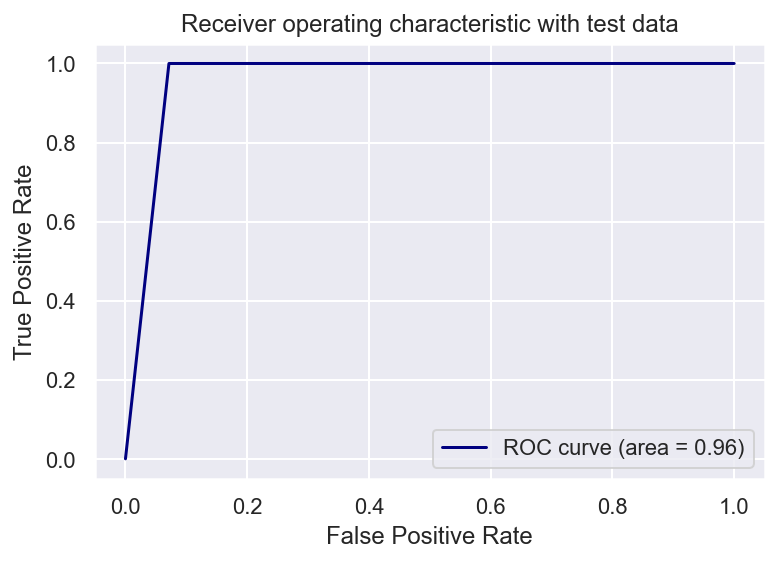

In [248]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_pred_test)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

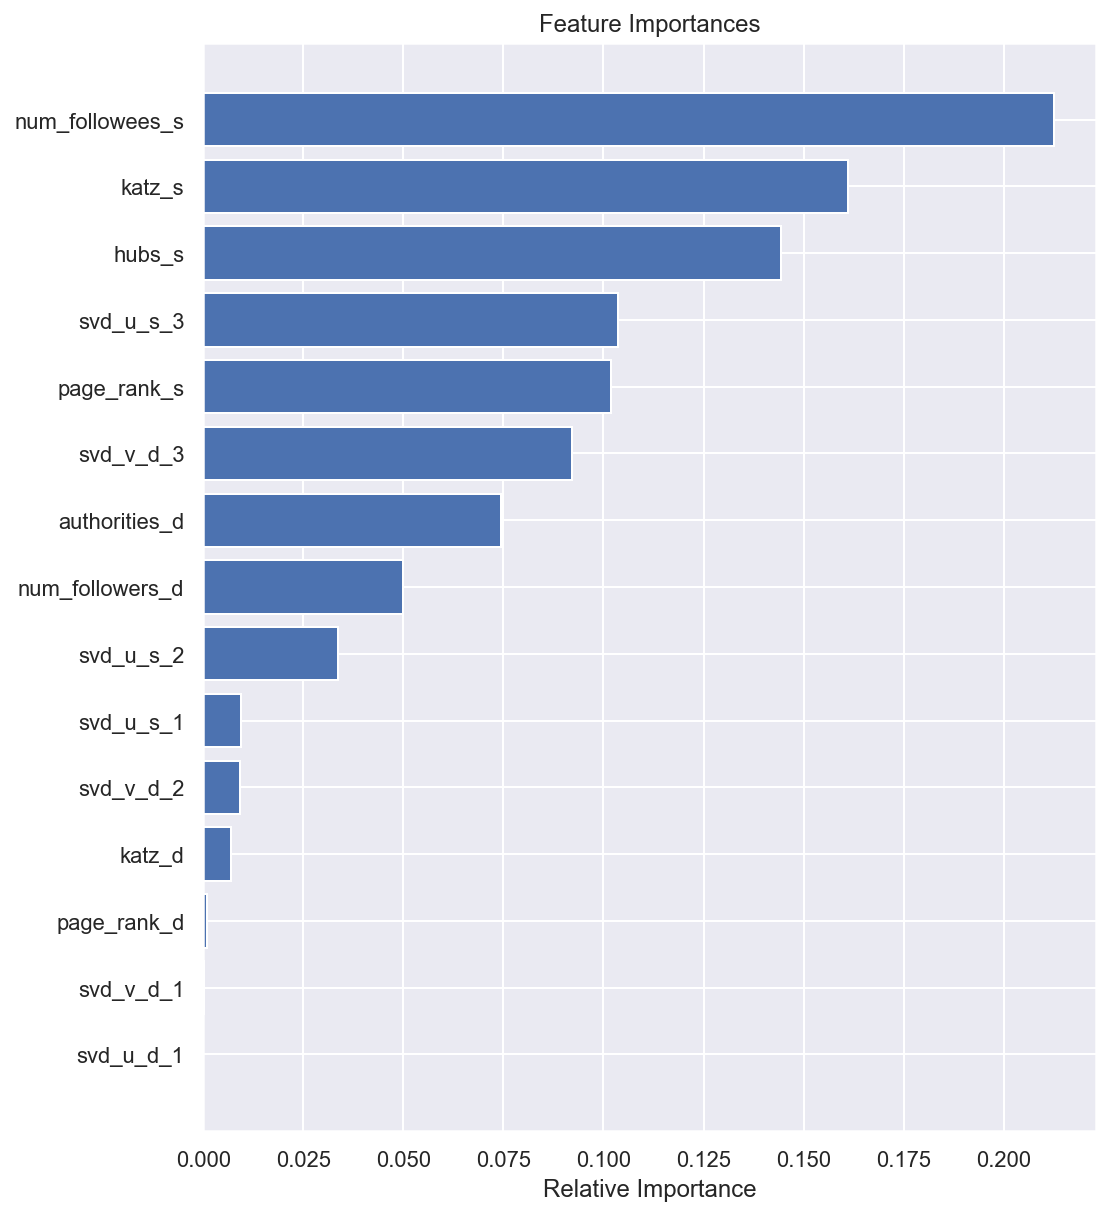

In [249]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [250]:
df.head()

Requestor GPN  GUI LastName FirstName        EmailAddress  \
2552       GPN 2553  123   XY2553       ABC  abc.xyz@gds.ey.com   
14848     GPN 14849  123  XY14849       ABC  abc.xyz@gds.ey.com   
2668       GPN 2669  123   XY2669       ABC  abc.xyz@gds.ey.com   
17235     GPN 17236  123  XY17236       ABC  abc.xyz@gds.ey.com   
8105       GPN 8106  123   XY8106       ABC  abc.xyz@gds.ey.com   

      EmployeeStatusDesc    Country Rank Name Badge Type Badge Status  \
2552              Active  Country 1   Rank 13     Bronze     Approved   
14848             Active  Country 3   Rank 13     Bronze     Approved   
2668              Active  Country 3   Rank 14     Bronze     Approved   
17235             Active  Country 5   Rank 13     Bronze     Approved   
8105          Terminated  Country 3   Rank 15     Bronze     Approved   

                    Domain                  Sub Domain Badge Classification  \
2552             Analytics            Data integration           TECHNOLOGY   
14848  Emerging Technology  Robotic process automation           TECHNOLOGY   
2668             Analytics                Data science           TECHNOLOGY   
17235  Emerging Technology  Robotic process automation           TECHNOLOGY   
8105   Emerging Technology     Artificial intelligence           TECHNOLOGY   

      Badge earned GDS SL Initiate a badge date  Parent_process_encoded  \
2552    2017-12-20   SL 6            2017-11-29                      41   
14848   2017-12-20  SL 17            2017-12-19                      41   
2668    2018-01-08   SL 6            2017-12-28                      42   
17235   2018-01-08  SL 20            2018-01-03                      41   
8105    2018-01-17   SL 6            2017-12-01                      43   

       New_process_encoded  
2552                    12  
14848                   54  
2668                    14  
17235                   54  
8105                     3

In [252]:
unique_proc = pd.DataFrame({'process_count' : df.groupby(['Rank Name','Sub Domain']).size()}).reset_index()

In [254]:
A = list(unique_proc["Rank Name"].unique())
#B = list(unique_proc["Sub Domain"].unique())

node_list = set(A)

G = nx.Graph()

for i in node_list:
    G.add_node(i)
    
for i,j in unique_proc.iterrows():
    G.add_edges_from([(j["Rank Name"],j["Sub Domain"])])

pos = nx.spring_layout(G, k=0.5, iterations=50)

for n, p in pos.items():
    G.nodes[n]['pos'] = p
    
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.8,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Process network connections',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

In [255]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

  # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [256]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [257]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [258]:
len(node_groups)

2

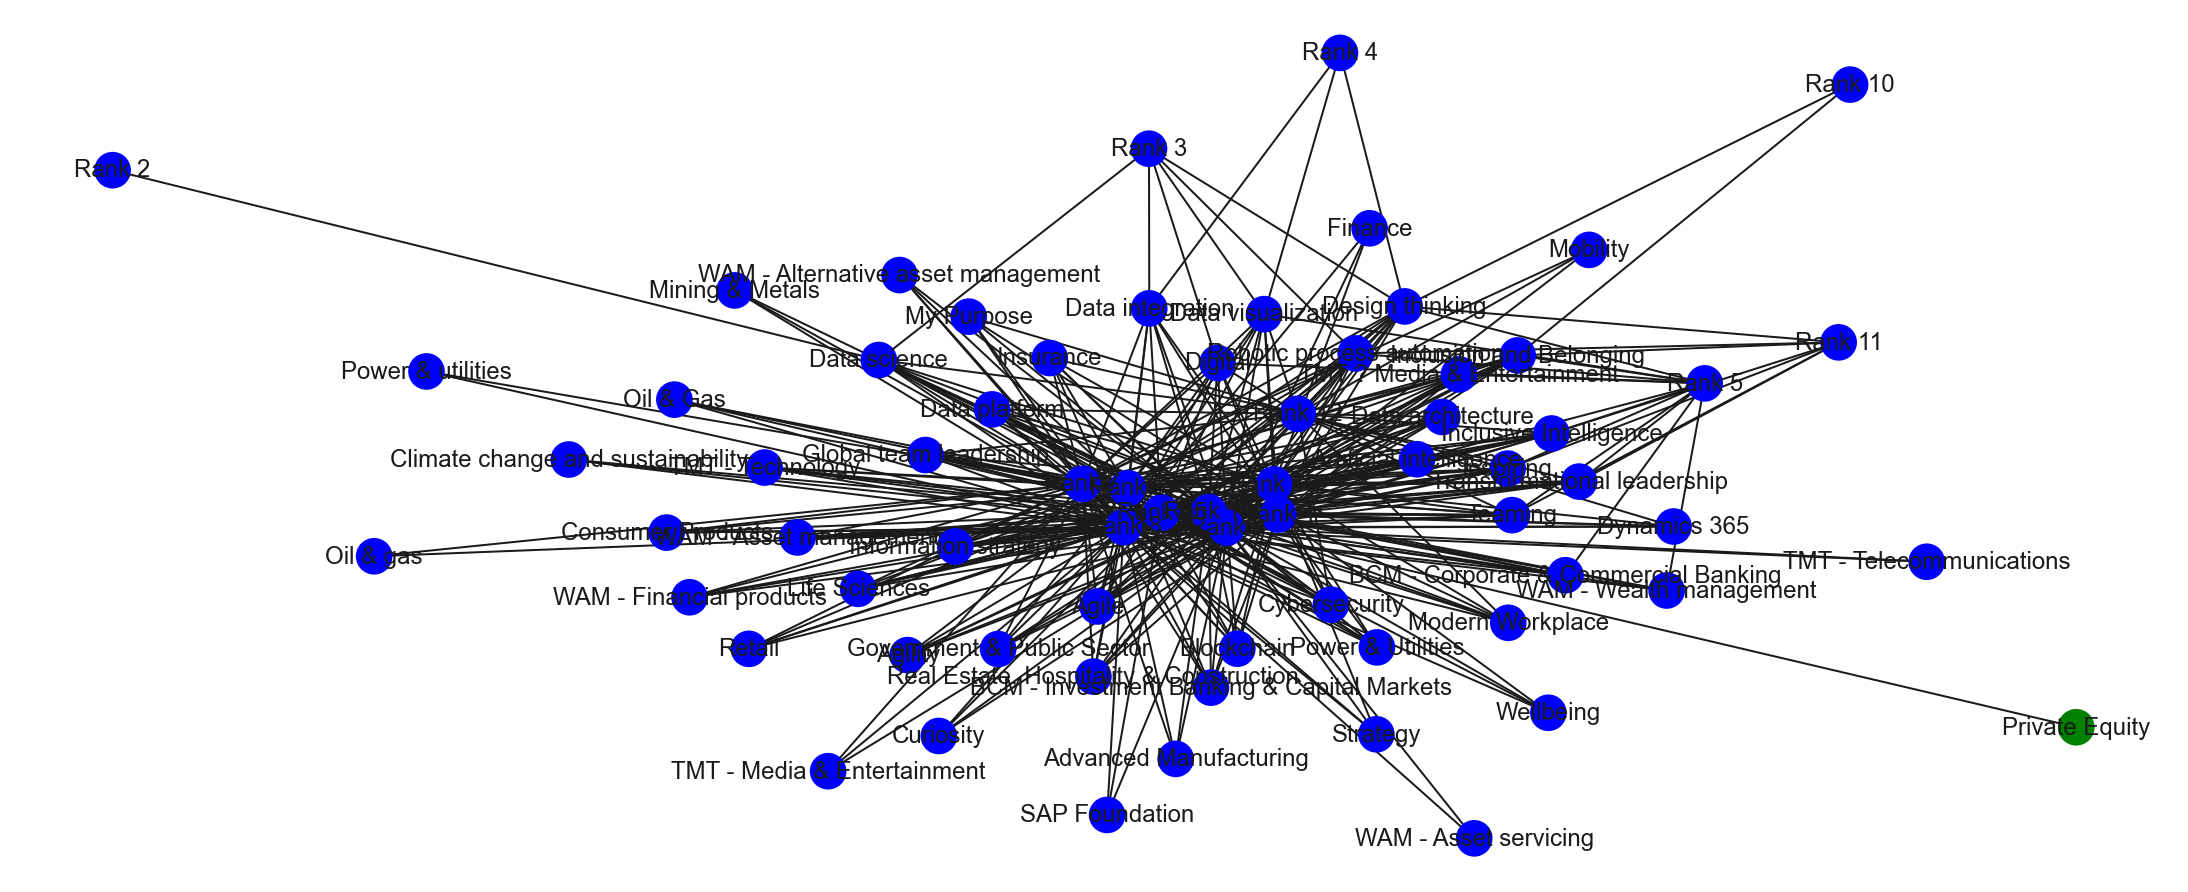

In [259]:
plt.figure(figsize=(15,6))

# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('green')
    elif node in node_groups[2]:
        color_map.append('yellow')
    else:
        color_map.append('red')
#print(color_map)
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter

In [262]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(dict_eigenvector_centrality).most_common(10))


{'Rank 8': 0.28711010507406176,
 'Rank 9': 0.2867747122021847,
 'Rank 7': 0.2541078601051435,
 'Rank 6': 0.22362891754612146,
 'Rank 14': 0.21928827416322574,
 'Rank 13': 0.21148903277061548,
 'Rank 15': 0.21134427142382572,
 'Rank 1': 0.20464329114227736,
 'Rank 12': 0.16154979388549456,
 'Design thinking': 0.13782838406520967}

<ipython-input-263-1c944a50fa9a>:5: MatplotlibDeprecationWarning:

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.



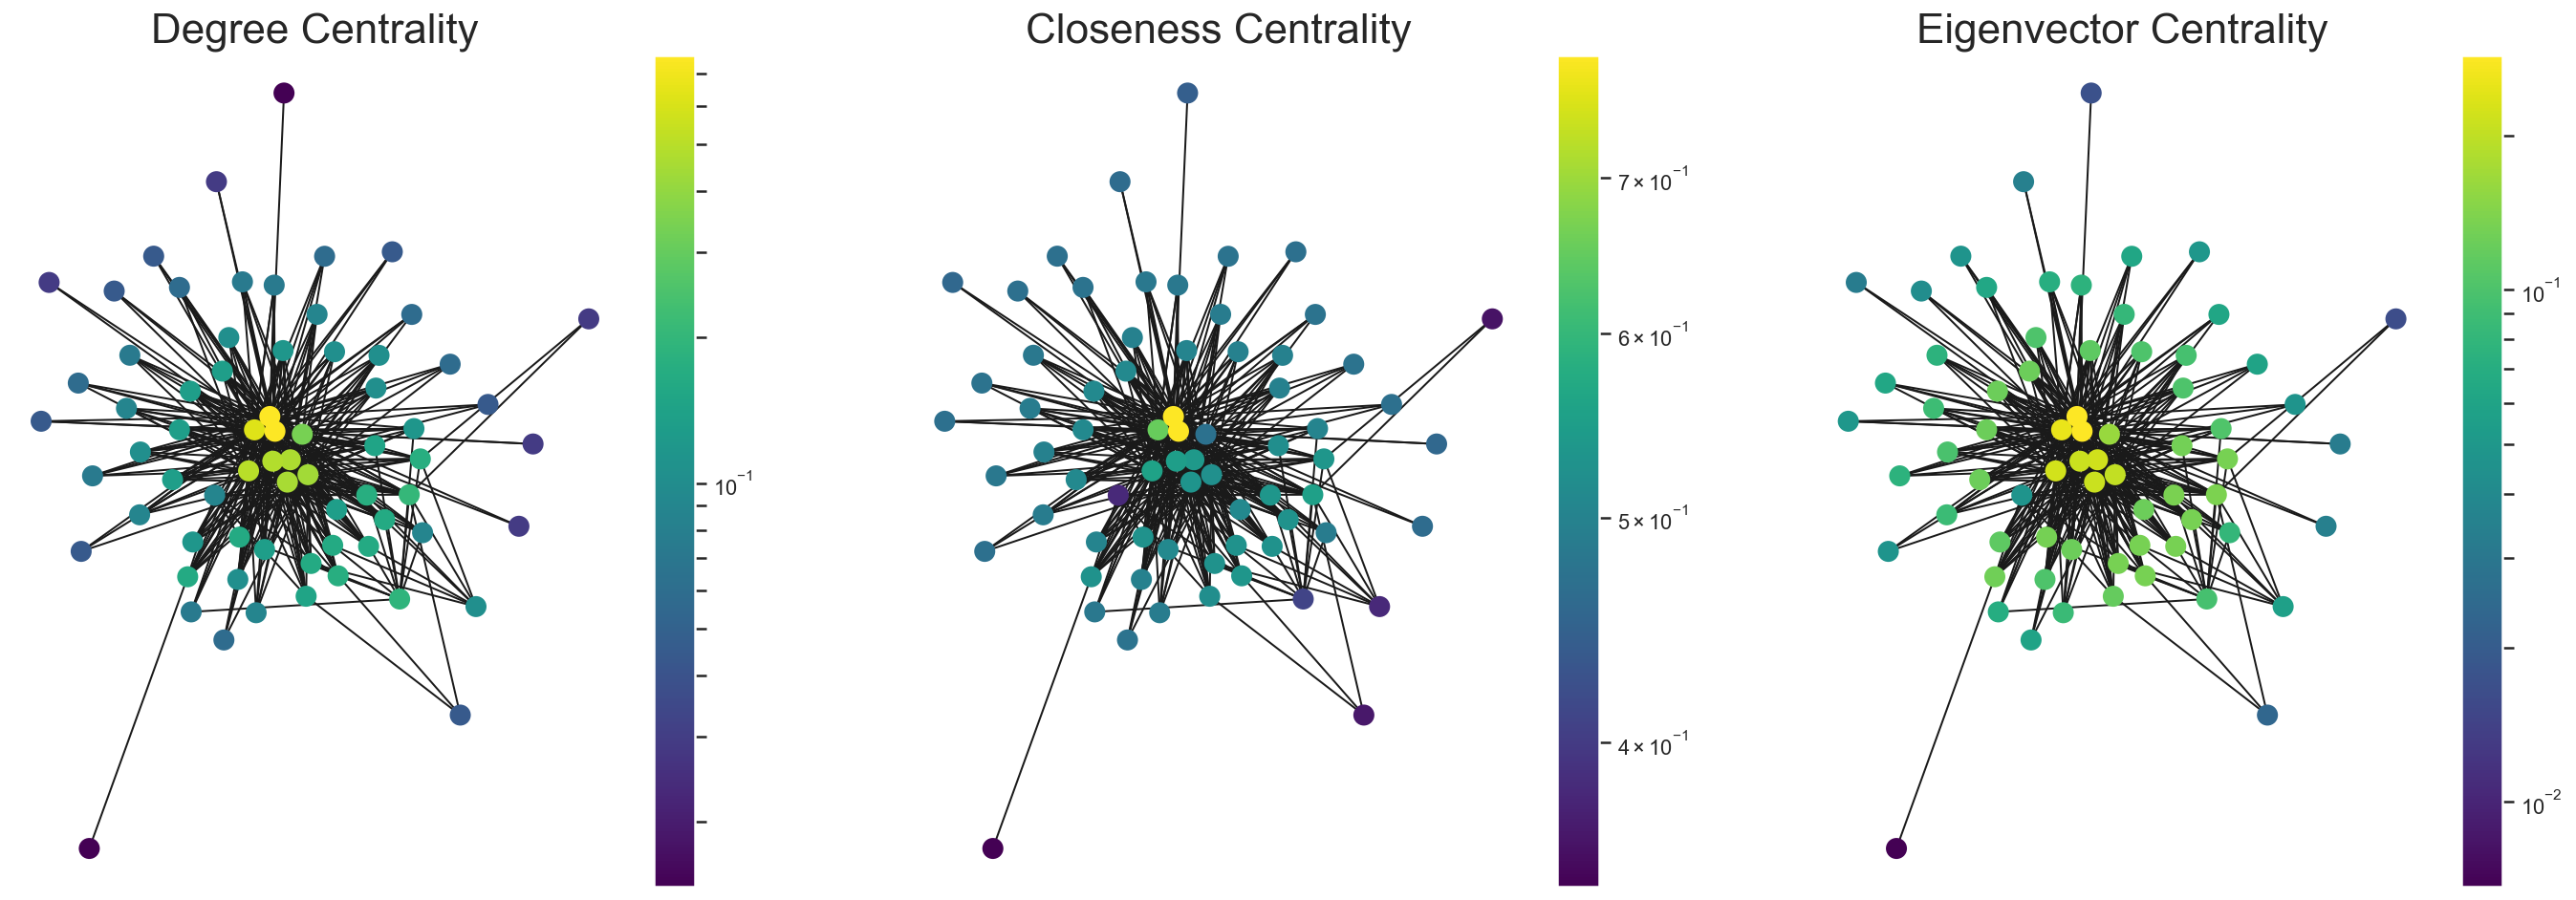

In [263]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality')
plt.savefig('centrality_summary.png' , dpi=400)

In [264]:
#!pip install python-louvain
from networkx.algorithms.community.centrality import girvan_newman
from community import community_louvain
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community_louvain.best_partition(G, weight='process_count')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.100718079423705
Total number of Communities= 6


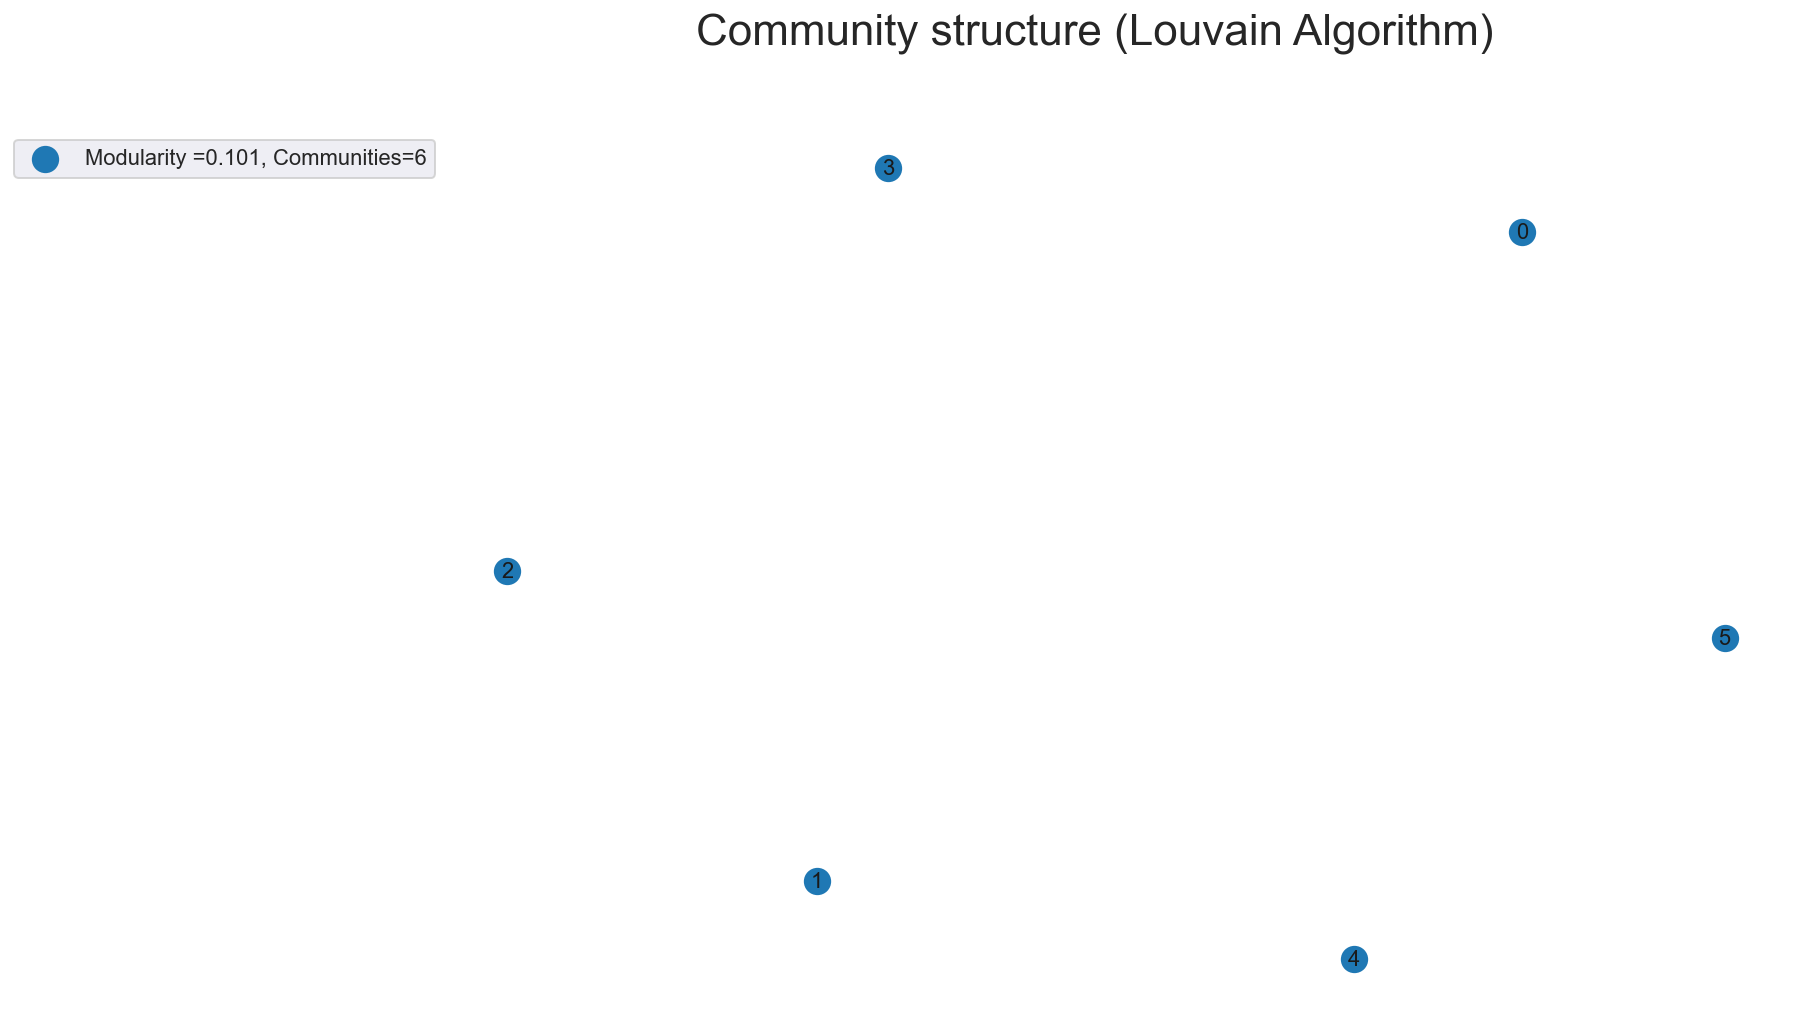

In [265]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community_louvain.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

In [266]:
# Viewing the list of communities
community_df

Members
Community_Num                                                                                                                                                                                                                                                                                                                         
0                           Rank 7 | Rank 8 | Rank 6 | Government & Public Sector | Finance | Life Sciences | Advanced Manufacturing | Consumer Products | Retail | WAM - Financial products | Oil & Gas | WAM - Alternative asset management | Oil & gas | Power & utilities | TMT - Media & Entertainment | TMT - Telecommunications
1                                    Rank 14 | Rank 15 | Rank 1 | Agile | Agility | Blockchain | Curiosity | Cybersecurity | Data architecture | My Purpose | Power & Utilities | Real Estate, Hospitality & Construction | WAM - Asset management | Wellbeing | TMT - Technology | Climate change and sustainability | SAP Foundation
2                                                                                                                                                                                                                                                  Rank 4 | Rank 3 | Data integration | Data visualization | Design thinking | Digital
3              Rank 11 | Rank 5 | Rank 9 | Artificial intelligence | Inclusive Intelligence | Inspiring | Robotic process automation | TMT ? Media & Entertainment | Teaming | Transformational leadership | BCM - Corporate & Commercial Banking | WAM - Wealth management | Mining & Metals | WAM - Asset servicing | Private Equity
4                                                                                                                                                                                                                                                                                                    Rank 10 | Inclusion and Belonging
5                                                                                                           Rank 12 | Rank 2 | Rank 13 | BCM - Investment Banking & Capital Markets | Data platform | Data science | Global team leadership | Information strategy | Modern Workplace | Dynamics 365 | Insurance | Mobility | Strategy

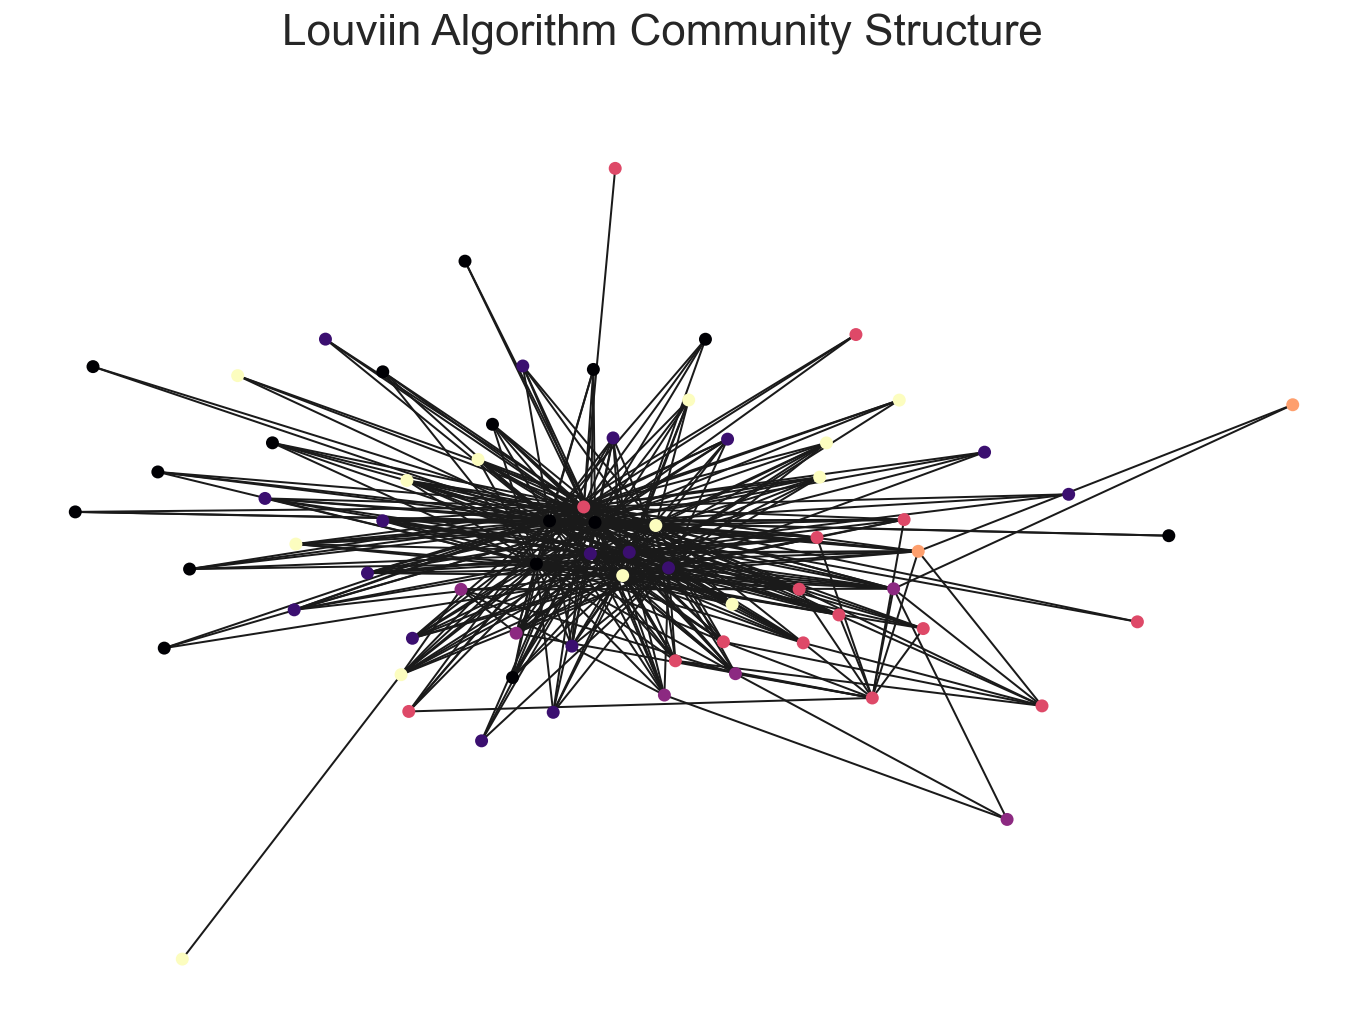

In [267]:
# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2_ey.png',dpi=400, bbox_inches='tight')
plt.show()

In [269]:
unique_proc

Rank Name                                  Sub Domain  process_count
0      Rank 1                                       Agile             26
1      Rank 1                                     Agility              2
2      Rank 1                     Artificial intelligence             13
3      Rank 1  BCM - Investment Banking & Capital Markets              1
4      Rank 1                                  Blockchain              5
5      Rank 1                                   Curiosity              3
6      Rank 1                               Cybersecurity             56
7      Rank 1                           Data architecture              1
8      Rank 1                            Data integration             24
9      Rank 1                               Data platform              3
10     Rank 1                                Data science             53
11     Rank 1                          Data visualization            386
12     Rank 1                             Design thinking             68
13     Rank 1                                     Digital             34
14     Rank 1                      Global team leadership              1
15     Rank 1                  Government & Public Sector              1
16     Rank 1                     Inclusion and Belonging             39
17     Rank 1                      Inclusive Intelligence             18
18     Rank 1                        Information strategy              1
19     Rank 1                                   Inspiring             24
20     Rank 1                            Modern Workplace              1
21     Rank 1                                  My Purpose              1
22     Rank 1                           Power & Utilities              1
23     Rank 1     Real Estate, Hospitality & Construction              1
24     Rank 1                  Robotic process automation             55
25     Rank 1                 TMT ? Media & Entertainment              1
26     Rank 1                                     Teaming             41
27     Rank 1                 Transformational leadership              1
28     Rank 1                      WAM - Asset management              1
29     Rank 1                                   Wellbeing              5
30    Rank 10                             Design thinking              1
31    Rank 10                     Inclusion and Belonging              1
32    Rank 11                             Design thinking              3
33    Rank 11                     Inclusion and Belonging              1
34    Rank 11                      Inclusive Intelligence              1
35    Rank 11                                   Inspiring              2
36    Rank 11                  Robotic process automation              3
37    Rank 11                                     Teaming              1
38    Rank 11                 Transformational leadership              3
39    Rank 12                                       Agile             14
40    Rank 12                     Artificial intelligence              8
41    Rank 12                               Cybersecurity              6
42    Rank 12                           Data architecture              2
43    Rank 12                               Data platform              2
44    Rank 12                                Data science              3
45    Rank 12                          Data visualization             20
46    Rank 12                             Design thinking             28
47    Rank 12                                     Digital              5
48    Rank 12                                Dynamics 365              2
49    Rank 12                      Global team leadership              1
50    Rank 12                     Inclusion and Belonging             10
51    Rank 12                      Inclusive Intelligence              3
52    Rank 12                        Information strategy              1
53    Rank 12                                   Inspiring     

In [270]:
FG = nx.from_pandas_edgelist(unique_proc, source='Rank Name', target='Sub Domain', edge_attr='process_count')

In [271]:
nx.algorithms.degree_centrality(FG)

{'Rank 1': 0.4411764705882353,
 'Agile': 0.1323529411764706,
 'Agility': 0.08823529411764705,
 'Artificial intelligence': 0.14705882352941177,
 'BCM - Investment Banking & Capital Markets': 0.10294117647058823,
 'Blockchain': 0.11764705882352941,
 'Curiosity': 0.058823529411764705,
 'Cybersecurity': 0.1323529411764706,
 'Data architecture': 0.1323529411764706,
 'Data integration': 0.14705882352941177,
 'Data platform': 0.1323529411764706,
 'Data science': 0.16176470588235295,
 'Data visualization': 0.1764705882352941,
 'Design thinking': 0.20588235294117646,
 'Digital': 0.16176470588235295,
 'Global team leadership': 0.1323529411764706,
 'Government & Public Sector': 0.10294117647058823,
 'Inclusion and Belonging': 0.1764705882352941,
 'Inclusive Intelligence': 0.16176470588235295,
 'Information strategy': 0.1323529411764706,
 'Inspiring': 0.16176470588235295,
 'Modern Workplace': 0.10294117647058823,
 'My Purpose': 0.07352941176470588,
 'Power & Utilities': 0.11764705882352941,
 'Real

In [272]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{30: 8.9,
 9: 36.666666666666664,
 6: 34.416666666666664,
 10: 32.95,
 7: 34.714285714285715,
 8: 37.083333333333336,
 4: 43.875,
 11: 31.606060606060606,
 12: 29.444444444444443,
 14: 25.785714285714285,
 5: 41.44,
 2: 42.4,
 23: 9.391304347826088,
 3: 40.80952380952381,
 31: 8.870967741935484,
 32: 8.875,
 33: 8.272727272727273,
 1: 31.5,
 13: 10.307692307692308,
 34: 8.441176470588236,
 43: 7.465116279069767,
 52: 6.884615384615385}

In [278]:
'''# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='Rank 1', target='Rank 10'):
    print(path)'''

"# Let us find all the paths available\nfor path in nx.all_simple_paths(FG, source='Rank 1', target='Rank 10'):\n    print(path)"

In [282]:
# Let us find the dijkstra path from svchost to sensecncproxy.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='Rank 1', target='Rank 4')
dijpath

['Rank 1', 'Data integration', 'Rank 4']

In [287]:
# Let us try to find the dijkstra path weighted by count1 (approximate case)
shortpath = nx.dijkstra_path(FG, source='Rank 10', target='Rank 15', weight='process_count')
shortpath

['Rank 10',
 'Inclusion and Belonging',
 'Rank 11',
 'Inclusive Intelligence',
 'Rank 5',
 'BCM - Corporate & Commercial Banking',
 'Rank 15']

In [289]:
[n for n in FG.neighbors('Rank 11')]

['Design thinking',
 'Inclusion and Belonging',
 'Inclusive Intelligence',
 'Inspiring',
 'Robotic process automation',
 'Teaming',
 'Transformational leadership']

In [290]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]
    max_3_dc = list(sorted(deg_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_deg_dc,top2_deg_dc,top3_deg_dc = find_nodes_with_highest_deg_cent(FG)
print(top_deg_dc,top2_deg_dc,top3_deg_dc)

{'Rank 8', 'Rank 9'} {'Rank 8', 'Rank 9'} {'Rank 7'}


In [291]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_betw_cent(G):

    # Compute the degree centrality of G: deg_cent
    betw_cent = nx.betweenness_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(betw_cent.values()))
    max_2_dc = list(sorted(betw_cent.values()))[-2]
    max_3_dc = list(sorted(betw_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in betw_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_betw_dc,top2_betw_dc,top3_betw_dc = find_nodes_with_highest_betw_cent(FG)
print(top_betw_dc,top2_betw_dc,top3_betw_dc)

{'Rank 9'} {'Rank 8'} {'Rank 7'}


In [292]:
cc=nx.average_clustering(FG) 
print(cc)

c=nx.clustering(FG) 
print(c)

0.0
{'Rank 1': 0, 'Agile': 0, 'Agility': 0, 'Artificial intelligence': 0, 'BCM - Investment Banking & Capital Markets': 0, 'Blockchain': 0, 'Curiosity': 0, 'Cybersecurity': 0, 'Data architecture': 0, 'Data integration': 0, 'Data platform': 0, 'Data science': 0, 'Data visualization': 0, 'Design thinking': 0, 'Digital': 0, 'Global team leadership': 0, 'Government & Public Sector': 0, 'Inclusion and Belonging': 0, 'Inclusive Intelligence': 0, 'Information strategy': 0, 'Inspiring': 0, 'Modern Workplace': 0, 'My Purpose': 0, 'Power & Utilities': 0, 'Real Estate, Hospitality & Construction': 0, 'Robotic process automation': 0, 'TMT ? Media & Entertainment': 0, 'Teaming': 0, 'Transformational leadership': 0, 'WAM - Asset management': 0, 'Wellbeing': 0, 'Rank 10': 0, 'Rank 11': 0, 'Rank 12': 0, 'Dynamics 365': 0, 'Insurance': 0, 'Mobility': 0, 'Rank 13': 0, 'Finance': 0, 'Life Sciences': 0, 'Strategy': 0, 'Rank 14': 0, 'Advanced Manufacturing': 0, 'TMT - Technology': 0, 'Rank 15': 0, 'BCM - C

In [294]:
# returns a Dictionary with clustering value of each node 
print(nx.clustering(FG)) 
  
# This returns clustering value of specified node 
print(nx.clustering(FG, 'Rank 1')) 

{'Rank 1': 0, 'Agile': 0, 'Agility': 0, 'Artificial intelligence': 0, 'BCM - Investment Banking & Capital Markets': 0, 'Blockchain': 0, 'Curiosity': 0, 'Cybersecurity': 0, 'Data architecture': 0, 'Data integration': 0, 'Data platform': 0, 'Data science': 0, 'Data visualization': 0, 'Design thinking': 0, 'Digital': 0, 'Global team leadership': 0, 'Government & Public Sector': 0, 'Inclusion and Belonging': 0, 'Inclusive Intelligence': 0, 'Information strategy': 0, 'Inspiring': 0, 'Modern Workplace': 0, 'My Purpose': 0, 'Power & Utilities': 0, 'Real Estate, Hospitality & Construction': 0, 'Robotic process automation': 0, 'TMT ? Media & Entertainment': 0, 'Teaming': 0, 'Transformational leadership': 0, 'WAM - Asset management': 0, 'Wellbeing': 0, 'Rank 10': 0, 'Rank 11': 0, 'Rank 12': 0, 'Dynamics 365': 0, 'Insurance': 0, 'Mobility': 0, 'Rank 13': 0, 'Finance': 0, 'Life Sciences': 0, 'Strategy': 0, 'Rank 14': 0, 'Advanced Manufacturing': 0, 'TMT - Technology': 0, 'Rank 15': 0, 'BCM - Corpo

In [296]:
# returns True or False whether Graph is connected 
print(nx.is_connected(FG)) 
  
# returns number of different connected components 
print(nx.number_connected_components(FG)) 
  
# returns list of nodes in different connected components 
print(list(nx.connected_components(FG))) 
  
# returns list of nodes of component containing given node  
print(nx.node_connected_component(FG, 'Rank 1')) 
  
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(FG)) 
  
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(FG)) 

True
1
[{'WAM - Alternative asset management', 'Mobility', 'Data visualization', 'Curiosity', 'Rank 8', 'Finance', 'Rank 9', 'Inclusion and Belonging', 'Government & Public Sector', 'Digital', 'Teaming', 'Information strategy', 'Retail', 'WAM - Wealth management', 'Robotic process automation', 'Advanced Manufacturing', 'Insurance', 'TMT - Technology', 'Global team leadership', 'SAP Foundation', 'Oil & gas', 'Rank 15', 'TMT - Media & Entertainment', 'TMT ? Media & Entertainment', 'Rank 10', 'WAM - Asset servicing', 'Consumer Products', 'Oil & Gas', 'WAM - Asset management', 'Design thinking', 'Dynamics 365', 'Rank 7', 'Rank 4', 'Rank 11', 'Agile', 'Power & Utilities', 'Rank 5', 'Data science', 'Rank 13', 'Climate change and sustainability', 'Blockchain', 'My Purpose', 'Cybersecurity', 'Inspiring', 'Inclusive Intelligence', 'BCM - Investment Banking & Capital Markets', 'Wellbeing', 'Mining & Metals', 'Rank 1', 'Rank 2', 'Data platform', 'Power & utilities', 'TMT - Telecommunications', 'B

In [297]:
print("Eccentricity: ", nx.eccentricity(FG)) 
print("Diameter: ", nx.diameter(FG)) 
print("Radius: ", nx.radius(FG)) 
print("Preiphery: ", list(nx.periphery(FG))) 
print("Center: ", list(nx.center(FG))) 

Eccentricity:  {'Rank 1': 3, 'Agile': 3, 'Agility': 3, 'Artificial intelligence': 3, 'BCM - Investment Banking & Capital Markets': 3, 'Blockchain': 3, 'Curiosity': 3, 'Cybersecurity': 3, 'Data architecture': 3, 'Data integration': 3, 'Data platform': 3, 'Data science': 3, 'Data visualization': 3, 'Design thinking': 3, 'Digital': 3, 'Global team leadership': 3, 'Government & Public Sector': 3, 'Inclusion and Belonging': 3, 'Inclusive Intelligence': 3, 'Information strategy': 3, 'Inspiring': 3, 'Modern Workplace': 3, 'My Purpose': 3, 'Power & Utilities': 3, 'Real Estate, Hospitality & Construction': 3, 'Robotic process automation': 3, 'TMT ? Media & Entertainment': 3, 'Teaming': 3, 'Transformational leadership': 3, 'WAM - Asset management': 3, 'Wellbeing': 3, 'Rank 10': 4, 'Rank 11': 4, 'Rank 12': 3, 'Dynamics 365': 3, 'Insurance': 3, 'Mobility': 3, 'Rank 13': 3, 'Finance': 3, 'Life Sciences': 3, 'Strategy': 3, 'Rank 14': 3, 'Advanced Manufacturing': 3, 'TMT - Technology': 3, 'Rank 15': 

In [298]:
def common_neighbors(g, edges):
    result = []
    for edge in edges:
        node_one, node_two = edge[0], edge[1]
        num_common_neighbors = 0
        try:
            neighbors_one, neighbors_two = g.neighbors(node_one), g.neighbors(node_two)
            for neighbor in neighbors_one:
                if neighbor in neighbors_two:
                    num_common_neighbors += 1
            result.append((node_one, node_two, num_common_neighbors))
        except:
            pass
    return result

In [299]:
common_neighbors(g, edges)

[(41, 12, 0),
 (41, 54, 0),
 (41, 15, 0),
 (41, 13, 0),
 (41, 14, 0),
 (41, 60, 0),
 (41, 16, 0),
 (41, 3, 0),
 (41, 62, 0),
 (41, 6, 0),
 (41, 24, 0),
 (41, 17, 0),
 (41, 23, 0),
 (41, 20, 0),
 (41, 10, 0),
 (41, 1, 0),
 (41, 5, 0),
 (41, 27, 0),
 (41, 61, 0),
 (41, 22, 0),
 (41, 52, 0),
 (41, 11, 0),
 (41, 25, 0),
 (41, 26, 0),
 (41, 21, 0),
 (41, 34, 0),
 (41, 56, 0),
 (41, 2, 0),
 (41, 18, 0),
 (41, 19, 0),
 (41, 30, 0),
 (42, 14, 0),
 (42, 15, 0),
 (42, 54, 0),
 (42, 16, 0),
 (42, 62, 0),
 (42, 24, 0),
 (42, 13, 0),
 (42, 12, 0),
 (42, 3, 0),
 (42, 6, 0),
 (42, 17, 0),
 (42, 10, 0),
 (42, 11, 0),
 (42, 20, 0),
 (42, 64, 0),
 (42, 60, 0),
 (42, 23, 0),
 (42, 1, 0),
 (42, 5, 0),
 (42, 27, 0),
 (42, 22, 0),
 (42, 61, 0),
 (42, 52, 0),
 (42, 34, 0),
 (42, 25, 0),
 (42, 58, 0),
 (42, 21, 0),
 (42, 26, 0),
 (42, 18, 0),
 (42, 0, 0),
 (42, 2, 0),
 (42, 30, 0),
 (43, 3, 0),
 (43, 54, 0),
 (43, 14, 0),
 (43, 15, 0),
 (43, 16, 0),
 (43, 6, 0),
 (43, 12, 0),
 (43, 62, 0),
 (43, 17, 0),
 (43,

In [300]:
def CommonNeighbors(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    return len(u_neighbors.intersection(v_neighbors))

def AdamicAdar(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    aa = 0
    for i in u_neighbors.intersection(v_neighbors):
        aa += 1 / math.log(len(g.neighbors(i)))
    return aa

def ResourceAllocation(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    ra = 0
    for i in u_neighbors.intersection(v_neighbors):
        ra += 1 / float(len(g.neighbors(i)))
    return ra

def JaccardCoefficent(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    return len(u_neighbors.intersection(v_neighbors)) / float(len(u_neighbors.union(v_neighbors)))

def PreferentialAttachment(u, v, g):
    return len(g.neighbors(u))*len(g.neighbors(v))

def AllFeatures(u,v,g1, g2):
    '''
    the change of features in two consecutive sub graphs
    '''
    try:
        cn = CommonNeighbors(u, v, g2)
        aa = AdamicAdar(u, v, g2)
        ra = ResourceAllocation(u, v, g2)
        jc = JaccardCoefficent(u, v, g2)
        pa = PreferentialAttachment(u, v, g2)

        delta_cn = cn - CommonNeighbors(u, v, g1)
        delta_aa = aa - AdamicAdar(u, v, g1)
        delta_ra = ra - ResourceAllocation(u, v, g1)
        delta_jc = jc - JaccardCoefficent(u, v, g1)
        delta_pa = pa - PreferentialAttachment(u, v, g1)
        return {"cn":cn, "aa": aa, "ra":ra, "jc":jc, "pa":pa,
            "delta_cn": delta_cn, "delta_aa": delta_aa, "delta_ra": delta_ra,
             "delta_jc": delta_jc, "delta_pa": delta_pa}
    except:
        pass

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import networkx as nx
import plotly.graph_objs as go
import dash_table

import pandas as pd
from colour import Color
from datetime import datetime
from textwrap import dedent as d
import json


data = pd.read_csv(r'C:\Users\DarshanSM\Desktop\BornITC\Process chain mapping\df_top_process_combo.csv')

# import the css template, and pass the css template into dash
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = "Transaction Network"

YEAR=[12,16]
ACCOUNT = '1'
num = 20
n_clicks = 0
#process_list_encoded= '1'

def network_graph(yearRange, num):

    edge1 = pd.read_csv(r'C:\Users\DarshanSM\Desktop\BornITC\Process chain mapping\df_edge.csv')
    node1 = pd.read_csv(r'C:\Users\DarshanSM\Desktop\BornITC\Process chain mapping\df_node.csv')
    
    #print(edge1)
    #edge1.process_count = edge1.process_count.astype('int64')
    #edge1 = edge1.sort_values(by = 'process_count')
    edge1 = edge1[:num]
    
    # filter the record by datetime, to enable interactive control through the input box
    edge1['Datetime'] = "" # add empty Datetime column to edge1 dataframe
    accountSet=set() # contain unique account
    for index in range(0,len(edge1)):
        edge1['Datetime'][index] = datetime.strptime(edge1['TimeGenerated'][index], '%Y-%m-%d %H:%M:%S')
        if edge1['Datetime'][index].minute<yearRange[0] or edge1['Datetime'][index].minute>yearRange[1]:
            #edge1.drop(axis=0, index=index, inplace=True)
            continue
        #accountSet.add(edge1['Source'][index])
        #accountSet.add(edge1['Target'][index])

    G = nx.from_pandas_edgelist(edge1, 'Parent_process_encoded', 'New_process_encoded', ['Parent_process_encoded', 'New_process_encoded', 'process_count', 'TimeGenerated'], create_using=nx.MultiDiGraph())
    nx.set_node_attributes(G, node1.set_index('process_list_encoded')['process_list'].to_dict(), 'process_list')
    nx.set_node_attributes(G, node1.set_index('process_list_encoded')['Type'].to_dict(), 'Type')
    pos = nx.layout.spring_layout(G)
    #pos = nx.layout.circular_layout(G)
    #nx.layout.shell_layout only works for more than 3 nodes
    #if len(shell2)>1:
        #pos = nx.drawing.layout.shell_layout(G, shells)
    #else:
        #pos = nx.drawing.layout.spring_layout(G)
        
    for node in G.nodes:
        G.nodes[node]['pos'] = list(pos[node])
    #print(G.nodes)

    traceRecode = []  # contains edge_trace, node_trace, middle_node_trace
    ############################################################################################################################################################
    colors = list(Color('lightcoral').range_to(Color('darkred'), len(G.edges())))
    colors = ['rgb' + str(x.rgb) for x in colors]

    #marker=dict(color=colors[index]),
    index = 0
    for edge in G.edges:
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        weight = float(G.edges[edge]['process_count']) / max(edge1['process_count']) * 10
        trace = go.Scatter(x=tuple([x0, x1, None]), y=tuple([y0, y1, None]),
                           mode='lines',
                           line={'width': weight},
                           line_shape='spline',
                           opacity=1)
        traceRecode.append(trace)
        index = index + 1
    ###############################################################################################################################################################
    node_trace = go.Scatter(x=[], y=[], hovertext=[], text=[], mode='markers+text', textposition="bottom center",
                            hoverinfo="text", marker={'size': 25, 'color': 'LightSkyBlue'})

    index = 0
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        hovertext = "process_list: " + str(G.nodes[node]['process_list']) + "<br>" + "AccountType: " + str(
            G.nodes[node]['Type'])
        text = node1['process_list_encoded'][index]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['hovertext'] += tuple([hovertext])
        node_trace['text'] += tuple([text])
        index = index + 1

    traceRecode.append(node_trace)
    ################################################################################################################################################################
    middle_hover_trace = go.Scatter(x=[], y=[], hovertext=[], mode='markers', hoverinfo="text",
                                    marker={'size': 20, 'color': 'LightSkyBlue'},
                                    opacity=0)

    index = 0
    for edge in G.edges:
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        hovertext = "From: " + str(G.edges[edge]['Parent_process_encoded']) + "<br>" + "To: " + str(
            G.edges[edge]['New_process_encoded']) + "<br>" + "process_count: " + str(
            G.edges[edge]['process_count']) + "<br>" + "ProcessCreationDate: " + str(G.edges[edge]['TimeGenerated'])
        middle_hover_trace['x'] += tuple([(x0 + x1) / 2])
        middle_hover_trace['y'] += tuple([(y0 + y1) / 2])
        middle_hover_trace['hovertext'] += tuple([hovertext])
        index = index + 1

    traceRecode.append(middle_hover_trace)
    #################################################################################################################################################################
    figure = {
        "data": traceRecode,
        "layout": go.Layout(title='Process mapping Visualization', showlegend=False, hovermode='closest',
                            margin={'b': 40, 'l': 40, 'r': 40, 't': 40},
                            xaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
                            yaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
                            height=600,
                            clickmode='event+select',
                            annotations=[
                                dict(
                                    ax=(G.nodes[edge[0]]['pos'][0] + G.nodes[edge[1]]['pos'][0]) / 2,
                                    ay=(G.nodes[edge[0]]['pos'][1] + G.nodes[edge[1]]['pos'][1]) / 2, axref='x', ayref='y',
                                    x=(G.nodes[edge[1]]['pos'][0] * 3 + G.nodes[edge[0]]['pos'][0]) / 4,
                                    y=(G.nodes[edge[1]]['pos'][1] * 3 + G.nodes[edge[0]]['pos'][1]) / 4, xref='x', yref='y',
                                    showarrow=True,
                                    arrowhead=3,
                                    arrowsize=4,
                                    arrowwidth=1,
                                    opacity=1
                                ) for edge in G.edges]
                            )}
    return figure


In [ ]:
traceRecode = (network_graph([48,52],20))

In [ ]:
graph_names = pd.Series(traceRecode.get('data')[-2]['hovertext']).str.split(pat = ':', expand = True)[1].str.split(pat = '<', expand = True)[0]

graph_names = pd.DataFrame(graph_names)

graph_names = graph_names.rename(columns={0:'graph_process_list'})

graph_names['process_encoded_graph'] = graph_names.index


In [ ]:
def get_graph_table():
    graph_table = dash_table.DataTable(
        id='graph_encoding',
        data=graph_names.to_dict('records'),
        columns=[{'id': c, 'name': c} for c in graph_names.columns],
        style_table={'overflowY': 'scroll'},
        fixed_rows={'headers': True, 'data': 5},
        style_cell={'width': '100px'},
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        }
    )
    return graph_table

######################################################################################################################################################################
# styles: for right side hover/click component
styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

app.layout =  html.Div([
    #########################Title
    html.Div([html.H1("Process chain Network Graph")],
             className="row",
             style={'textAlign': "center"}),
    
    html.Div([
        html.Div(dcc.Input(id='input-on-submit', type='number')),
        html.Button('Submit', id='submit-val', n_clicks=0),
        html.Div(id='container-button-basic',
                 children='Enter a value and press submit')
    ]),
    
    
    #############################################################################################define the row
    html.Div(children=[html.H1(children="Graph Table",
                               style={
                                   'textAlign': 'center',
                                   "background": "yellow"}),
                       get_graph_table()]),
    
        html.Div(
            className="row",
            children=[
                ##############################################left side two input components
                html.Div(
                    className="two columns",
                    children=[
                        dcc.Markdown(d("""
                                **Time Range To Visualize**
                                Slide the bar to define year range.
                                """)),
                        
                        html.Div(
                            className="twelve columns",
                            children=[
                                dcc.RangeSlider(
                                    id='my-range-slider',
                                    min=12,
                                    max=16,
                                    step=1,
                                    value=[12, 16],
                                    marks={
                                        12: {'label': '12'},
                                        13: {'label': '13'},
                                        14: {'label': '14'},
                                        15: {'label': '15'},
                                        16: {'label': '16'}
                                    }
                                ),
                                html.Br(),
                                html.Div(id='output-container-range-slider')
                            ],
                            style={'height': '300px'}
                        ),
                        
                        html.Div(
                            className="twelve columns",
                            children=[
                                dcc.Markdown(d("""
                                **Account To Search**
                                Input the number to visualize.
                                """)),
                                dcc.Input(id="input2", type="number"),
                                html.Div(id="output2")
                            ],
                            style={'height': '300px'}
                        )
                    ]
                ),

                ############################################middle graph component
                html.Div(
                    className="eight columns",
                    children=[dcc.Graph(id="my-graph",
                                        figure=network_graph(YEAR, num))],
                ),

                #########################################right side two output component
                html.Div(
                    className="two columns",
                    children=[
                        html.Div(
                            className='twelve columns',
                            children=[
                                dcc.Markdown(d("""
                                **Hover Data**
                                Mouse over values in the graph.
                                """)),
                                html.Pre(id='hover-data', style=styles['pre'])
                            ],
                            style={'height': '400px'}),

                        html.Div(
                            className='twelve columns',
                            children=[
                                dcc.Markdown(d("""
                                **Click Data**
                                Click on points in the graph.
                                """)),
                                html.Pre(id='click-data', style=styles['pre'])
                            ],
                            style={'height': '400px'})
                ]
            )
        ]
    )
])

###################################callback for left side components
@app.callback(
    dash.dependencies.Output('my-graph', 'figure'),
    [dash.dependencies.Input('my-range-slider', 'value'),
    dash.dependencies.Input('input2', 'value')])
    #[dash.dependencies.Input('drop-temp', 'input1'), dash.dependencies.Input('input1', 'value')])
def update_output(value, input2):
    YEAR = value
    #ACCOUNT = input1
    num = input2
    #n_clicks = 0
    return network_graph(value, input2)
    # to update the global variable of YEAR and ACCOUNT
    
@app.callback(
    dash.dependencies.Output('container-button-basic', 'children'),
    [dash.dependencies.Input('submit-val', 'n_clicks')],
    [dash.dependencies.State('input-on-submit', 'value')])

def update_output1(n_clicks, value):
    
    data_table = dash_table.DataTable(
        id='datatable-data',
        data=unique_proc[:value].to_dict('records'),
        columns=[{'id': c, 'name': c} for c in unique_proc.columns],
        style_table={'overflowY': 'scroll'},
        fixed_rows={'headers': True, 'data': 5},
        style_cell={'width': '100px'},
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        }
    )
    return data_table

################################callback for right side components
@app.callback(
    dash.dependencies.Output('hover-data', 'children'),
    [dash.dependencies.Input('my-graph', 'hoverData')])
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@app.callback(
    dash.dependencies.Output('click-data', 'children'),
    [dash.dependencies.Input('my-graph', 'clickData')])
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False, port = 8057)